In [263]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

## Functions

In [264]:
def prepare_plot_percentage_epoch(history, model_name):

    n_epochs = len(history['loss'])
    model_name = [model_name]*(n_epochs-1)
    best_loss_val = min(history['val_loss'])
    index_best_loss_val = max(history['val_loss'].index(best_loss_val), 1)

    fraction_epoch = [i/index_best_loss_val for i in range(1, n_epochs)]
    log_fraction_epoch = np.log(fraction_epoch)
    loss_train = history['loss'][1:]
    loss_val = history['val_loss'][1:]
    
    return pd.DataFrame(data={'name_model': model_name,
                              'fraction_best_epochs': fraction_epoch,
                              'log_fraction_best_epochs': log_fraction_epoch,
                              'loss_train': loss_train,
                              'loss_val': loss_val})

In [265]:
def get_best_epoch_val(history, model_name, param_val):
    
    best_loss_val = min(history['val_loss'])
    index_best_loss_val = max(history['val_loss'].index(best_loss_val), 1)
    
    return pd.DataFrame(data={'name_model': model_name,
                              'param_value': param_val,
                              'epoch_best_value': index_best_loss_val,
                              'best_loss_val': best_loss_val})

## Plot results of training

In [266]:
history_gd = pickle.load(open('../data/models/trainHistory_model_gd.p', 'rb'))

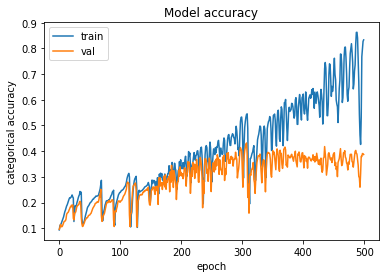

In [267]:
plt.plot(history_gd['categorical_accuracy'])
plt.plot(history_gd['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

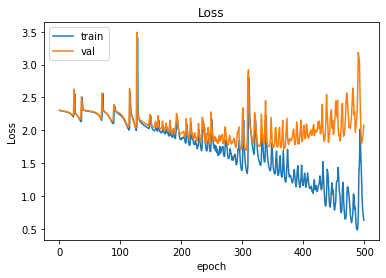

In [268]:
plt.plot(history_gd['loss'])
plt.plot(history_gd['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [269]:
df_results_gd = prepare_plot_percentage_epoch(history_gd, model_name='cat_cnn_gd')
df_results_gd.head(2)

,name_model,fraction_best_epochs,log_fraction_best_epochs,loss_train,loss_val
0,cat_cnn_gd,0.003257,-5.726848,2.301588,2.301290
1,cat_cnn_gd,0.006515,-5.033701,2.299079,2.299724


In [270]:
history_sgd_perc_04_batch_1 = pickle.load(open('../data/models/trainHistory_model_sgd_perc_04_batch1.p', 'rb'))

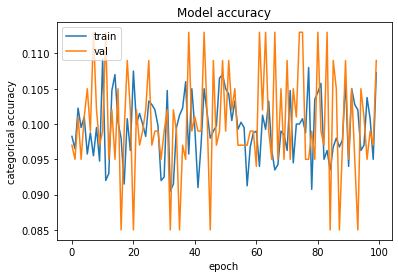

In [271]:
plt.plot(history_sgd_perc_04_batch_1['categorical_accuracy'])
plt.plot(history_sgd_perc_04_batch_1['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

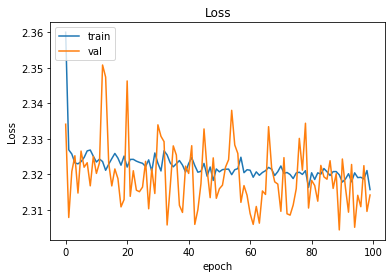

In [272]:
plt.plot(history_sgd_perc_04_batch_1['loss'])
plt.plot(history_sgd_perc_04_batch_1['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

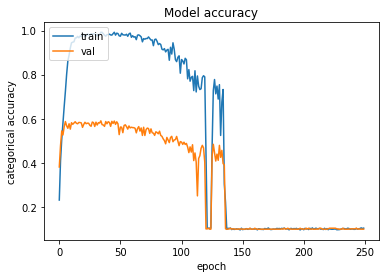

In [273]:
history_sgd_perc_04 = pickle.load(open('../data/models/trainHistory_model_sgd_perc_04.p', 'rb'))
plt.plot(history_sgd_perc_04['categorical_accuracy'])
plt.plot(history_sgd_perc_04['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

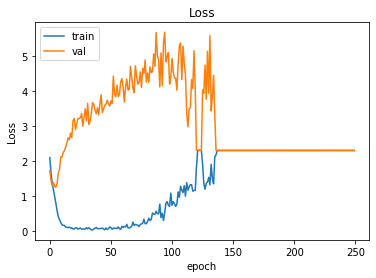

In [274]:
plt.plot(history_sgd_perc_04['loss'])
plt.plot(history_sgd_perc_04['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [275]:
history_sgd = pickle.load(open('../data/models/trainHistory_model_sgd.p', 'rb'))

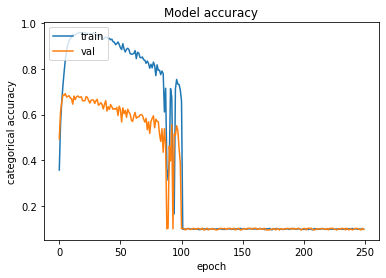

In [276]:
plt.plot(history_sgd['categorical_accuracy'])
plt.plot(history_sgd['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

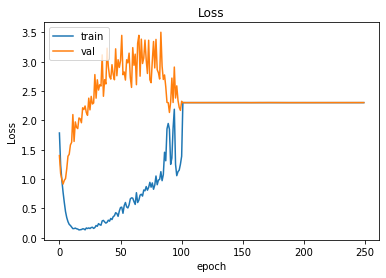

In [277]:
plt.plot(history_sgd['loss'])
plt.plot(history_sgd['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [278]:
df_results_sgd = prepare_plot_percentage_epoch(history_sgd, model_name='cat_cnn_sgd')
df_results_sgd.head(2)

,name_model,fraction_best_epochs,log_fraction_best_epochs,loss_train,loss_val
0,cat_cnn_sgd,0.333333,-1.098612,1.239857,1.093664
1,cat_cnn_sgd,0.666667,-0.405465,0.977876,0.995657


In [279]:
df_to_plot = pd.concat([df_results_gd, df_results_sgd])

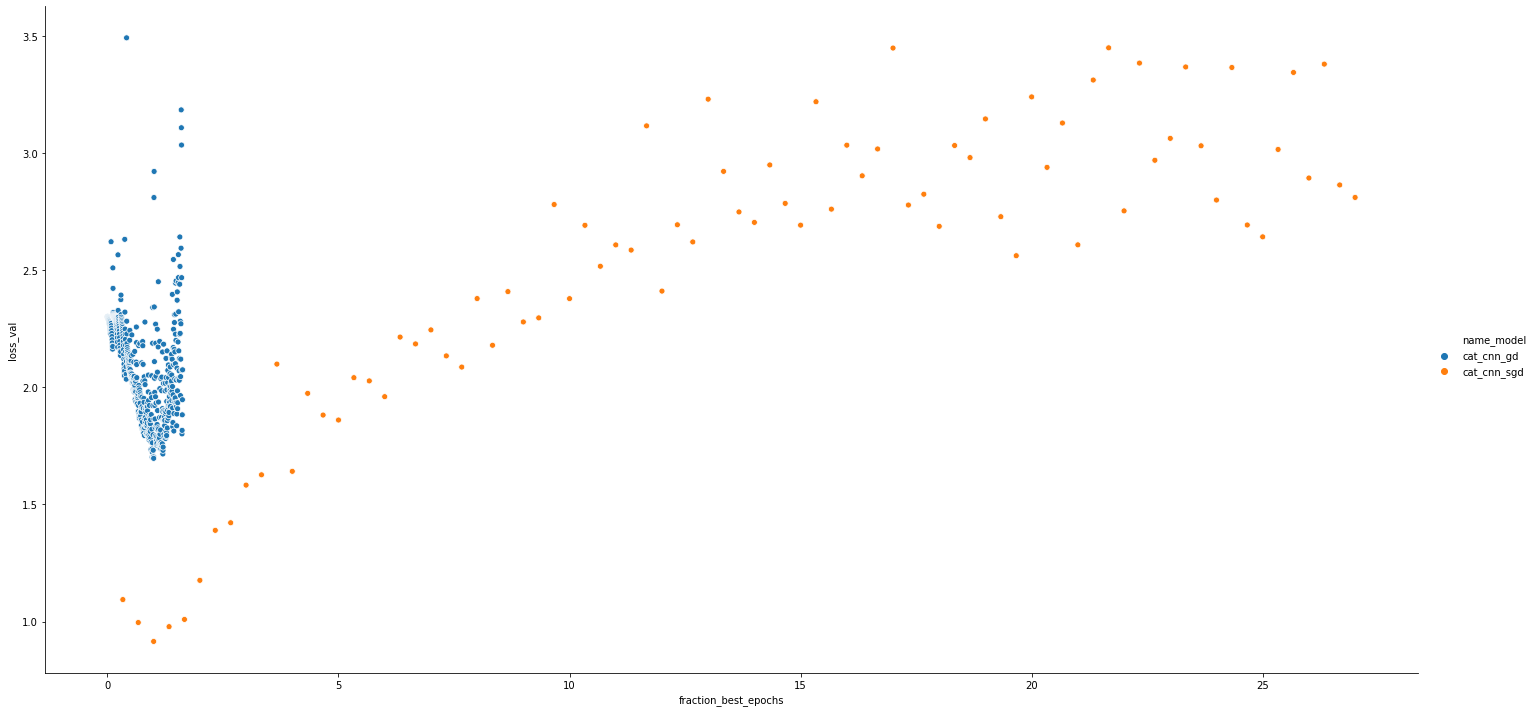

In [280]:
# Plot the results
sns.relplot(x='fraction_best_epochs', y='loss_val', hue='name_model',
            data=df_to_plot[df_to_plot['fraction_best_epochs'] <= 27], height=10, aspect=2.)

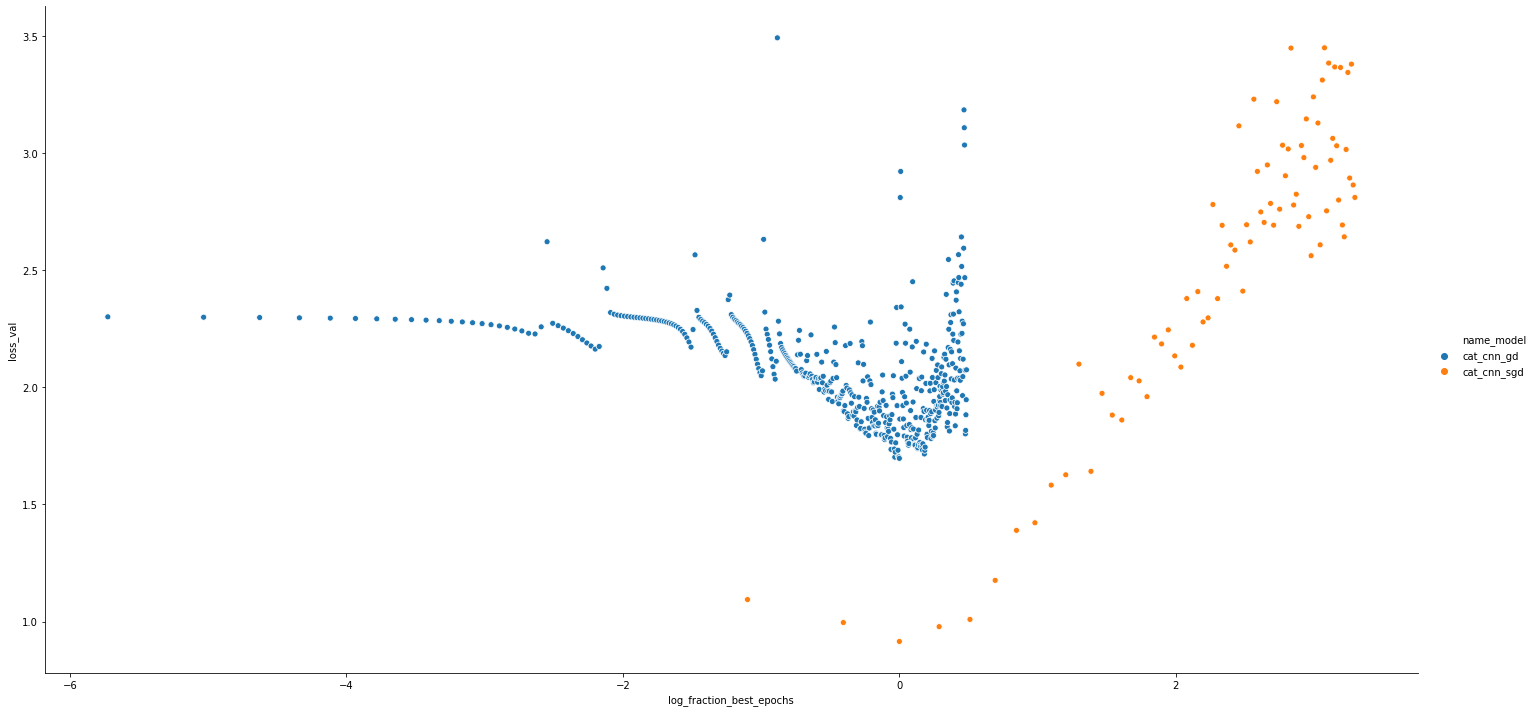

In [281]:
sns.relplot(x='log_fraction_best_epochs', y='loss_val', hue='name_model',
            data=df_to_plot[df_to_plot['fraction_best_epochs'] <= 27], height=10, aspect=2.)

## Batch size

In [282]:
history_sgd_ba_64 = pickle.load(open('../data/models/trainHistory_model_sgd_ba_64.p', 'rb'))

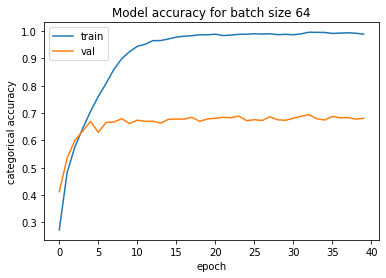

In [283]:
plt.plot(history_sgd_ba_64['categorical_accuracy'])
plt.plot(history_sgd_ba_64['val_categorical_accuracy'])
plt.title('Model accuracy for batch size 64')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

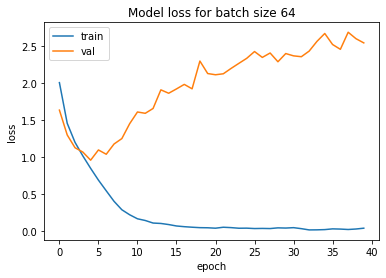

In [284]:
plt.plot(history_sgd_ba_64['loss'])
plt.plot(history_sgd_ba_64['val_loss'])
plt.title('Model loss for batch size 64')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [285]:
history_sgd_ba_128 = pickle.load(open('../data/models/trainHistory_model_sgd_ba_128.p', 'rb'))

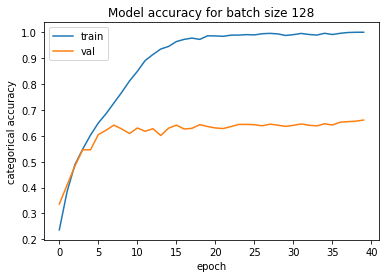

In [286]:
plt.plot(history_sgd_ba_128['categorical_accuracy'])
plt.plot(history_sgd_ba_128['val_categorical_accuracy'])
plt.title('Model accuracy for batch size 128')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

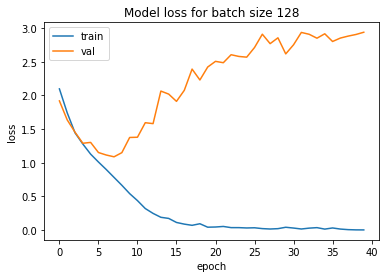

In [287]:
plt.plot(history_sgd_ba_128['loss'])
plt.plot(history_sgd_ba_128['val_loss'])
plt.title('Model loss for batch size 128')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [288]:
history_sgd_ba_256 = pickle.load(open('../data/models/trainHistory_model_sgd_ba_256.p', 'rb'))

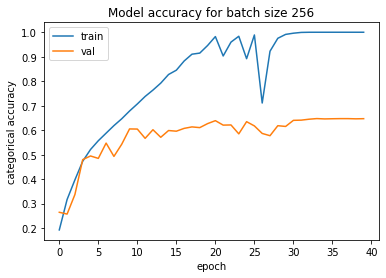

In [289]:
plt.plot(history_sgd_ba_256['categorical_accuracy'])
plt.plot(history_sgd_ba_256['val_categorical_accuracy'])
plt.title('Model accuracy for batch size 256')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

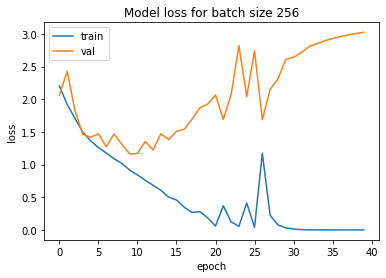

In [290]:
plt.plot(history_sgd_ba_256['loss'])
plt.plot(history_sgd_ba_256['val_loss'])
plt.title('Model loss for batch size 256')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [291]:
history_sgd_ba_512 = pickle.load(open('../data/models/trainHistory_model_sgd_ba_512.p', 'rb'))

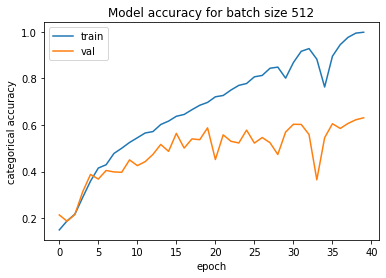

In [292]:
plt.plot(history_sgd_ba_512['categorical_accuracy'])
plt.plot(history_sgd_ba_512['val_categorical_accuracy'])
plt.title('Model accuracy for batch size 512')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

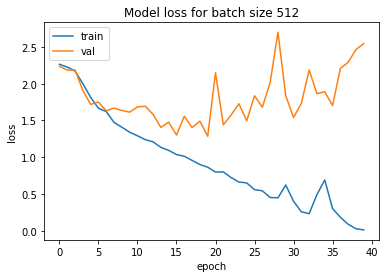

In [293]:
plt.plot(history_sgd_ba_512['loss'])
plt.plot(history_sgd_ba_512['val_loss'])
plt.title('Model loss for batch size 512')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [294]:
history_sgd_ba_1024 = pickle.load(open('../data/models/trainHistory_model_sgd_ba_1024.p', 'rb'))

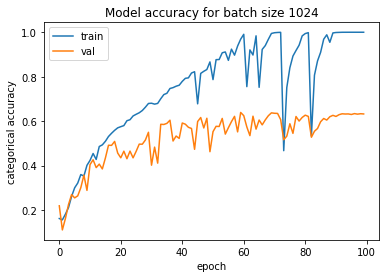

In [295]:
plt.plot(history_sgd_ba_1024['categorical_accuracy'])
plt.plot(history_sgd_ba_1024['val_categorical_accuracy'])
plt.title('Model accuracy for batch size 1024')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

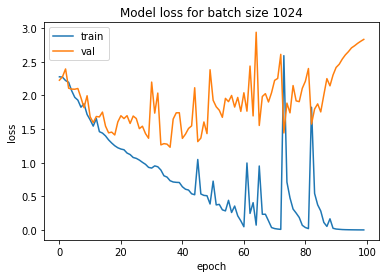

In [296]:
plt.plot(history_sgd_ba_1024['loss'])
plt.plot(history_sgd_ba_1024['val_loss'])
plt.title('Model loss for batch size 1024')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

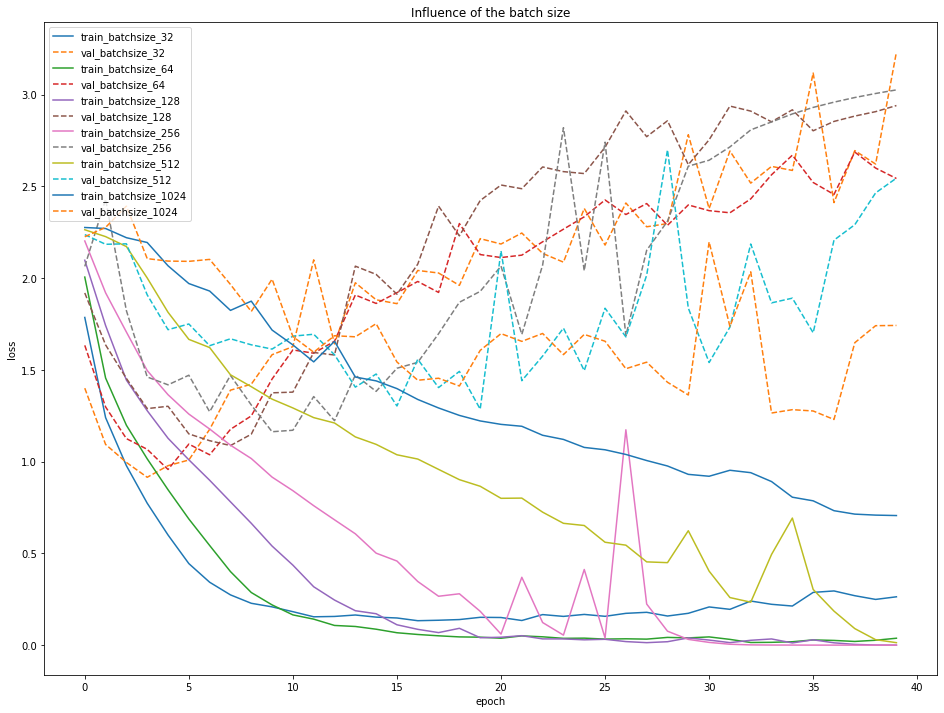

In [297]:
# Batch size influence
plt.figure(figsize=(16,12))
plt.plot(history_sgd['loss'][:40])
plt.plot(history_sgd['val_loss'][:40], '--')
plt.plot(history_sgd_ba_64['loss'])
plt.plot(history_sgd_ba_64['val_loss'], '--')
plt.plot(history_sgd_ba_128['loss'])
plt.plot(history_sgd_ba_128['val_loss'], '--')
plt.plot(history_sgd_ba_256['loss'])
plt.plot(history_sgd_ba_256['val_loss'], '--')
plt.plot(history_sgd_ba_512['loss'])
plt.plot(history_sgd_ba_512['val_loss'], '--')
plt.plot(history_sgd_ba_1024['loss'][:40])
plt.plot(history_sgd_ba_1024['val_loss'][:40], '--')
plt.title('Influence of the batch size')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_batchsize_32', 'val_batchsize_32',
            'train_batchsize_64', 'val_batchsize_64', 'train_batchsize_128', 'val_batchsize_128',
           'train_batchsize_256', 'val_batchsize_256', 'train_batchsize_512', 'val_batchsize_512',
           'train_batchsize_1024', 'val_batchsize_1024'],
           loc='upper left')
plt.show()

In [298]:
df_results_sgd_32 = prepare_plot_percentage_epoch(history_sgd, model_name='SGD_batchsize_32')
df_results_sgd_64 = prepare_plot_percentage_epoch(history_sgd_ba_64, model_name='SGD_batchsize_64')
df_results_sgd_128 = prepare_plot_percentage_epoch(history_sgd_ba_128, model_name='SGD_batchsize_128')
df_results_sgd_256 = prepare_plot_percentage_epoch(history_sgd_ba_256, model_name='SGD_batchsize_256')
df_results_sgd_512 = prepare_plot_percentage_epoch(history_sgd_ba_512, model_name='SGD_batchsize_512')
df_results_sgd_1024 = prepare_plot_percentage_epoch(history_sgd_ba_1024, model_name='SGD_batchsize_1024')

df_to_plot_bs = pd.concat([df_results_sgd_32, df_results_sgd_64, df_results_sgd_128,
                          df_results_sgd_256, df_results_sgd_512, df_results_sgd_1024])

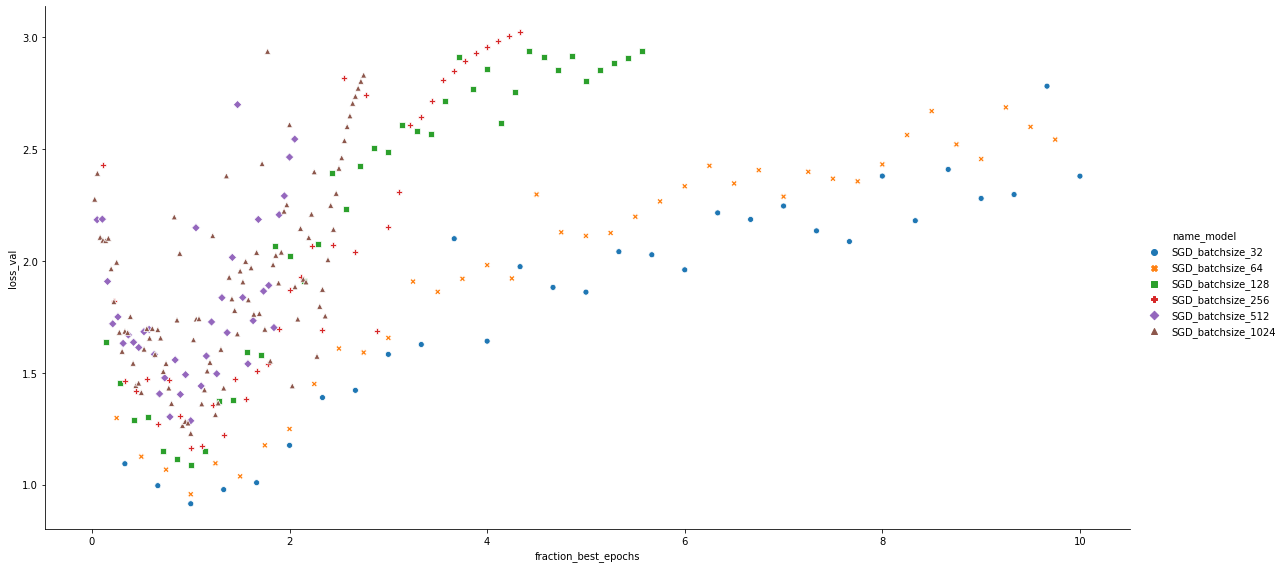

In [299]:
sns.relplot(x='fraction_best_epochs', y='loss_val', hue='name_model',
            style='name_model', #kind='line',
            data=df_to_plot_bs[df_to_plot_bs['fraction_best_epochs'] <= 10], height=8, aspect=2.)

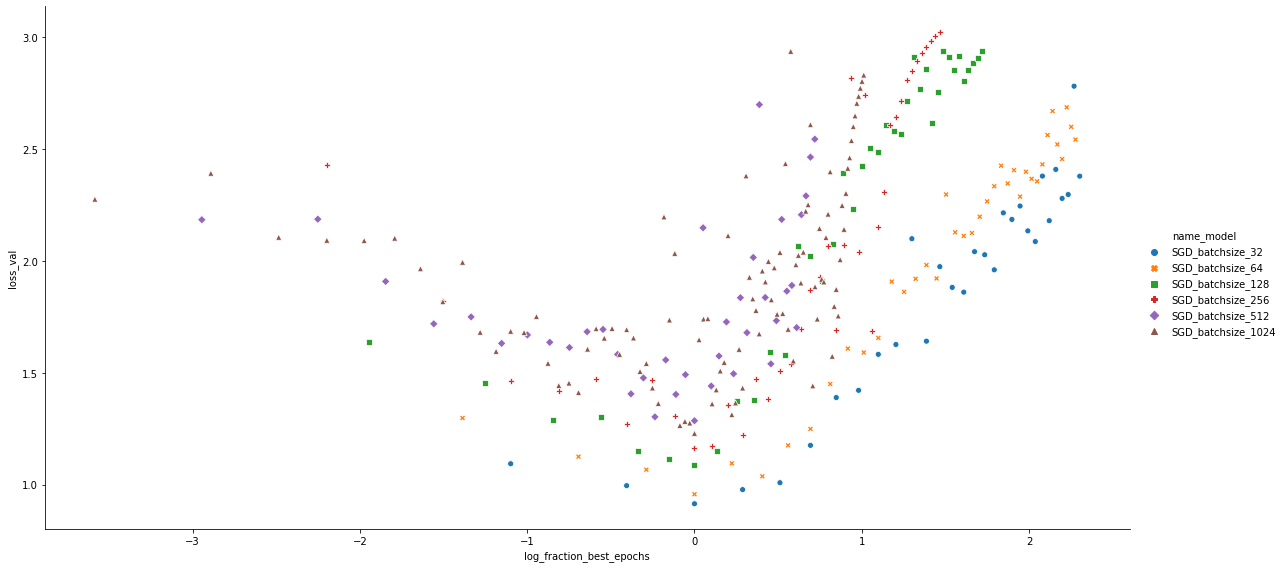

In [300]:
sns.relplot(x='log_fraction_best_epochs', y='loss_val', hue='name_model',
            style='name_model',
            data=df_to_plot_bs[df_to_plot_bs['fraction_best_epochs'] <= 10], height=8, aspect=2.)

## Momentum

In [301]:
history_sgd_mom_005 = pickle.load(open('../data/models/trainHistory_model_sgd_mom_005.p', 'rb'))

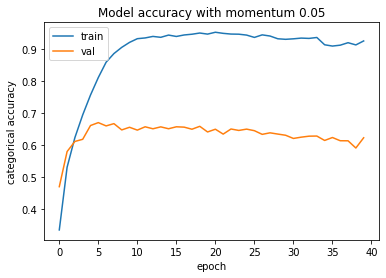

In [302]:
plt.plot(history_sgd_mom_005['categorical_accuracy'])
plt.plot(history_sgd_mom_005['val_categorical_accuracy'])
plt.title('Model accuracy with momentum 0.05')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

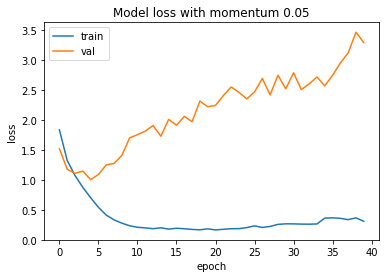

In [303]:
plt.plot(history_sgd_mom_005['loss'])
plt.plot(history_sgd_mom_005['val_loss'])
plt.title('Model loss with momentum 0.05')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [304]:
history_sgd_mom_01 = pickle.load(open('../data/models/trainHistory_model_sgd_mom_01.p', 'rb'))

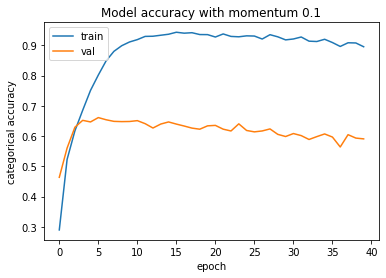

In [305]:
plt.plot(history_sgd_mom_01['categorical_accuracy'])
plt.plot(history_sgd_mom_01['val_categorical_accuracy'])
plt.title('Model accuracy with momentum 0.1')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

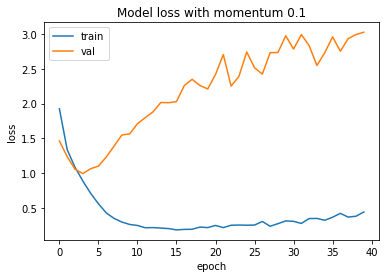

In [306]:
plt.plot(history_sgd_mom_01['loss'])
plt.plot(history_sgd_mom_01['val_loss'])
plt.title('Model loss with momentum 0.1')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [307]:
history_sgd_mom_05 = pickle.load(open('../data/models/trainHistory_model_sgd_mom_05.p', 'rb'))

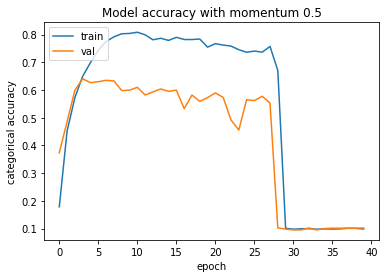

In [308]:
plt.plot(history_sgd_mom_05['categorical_accuracy'])
plt.plot(history_sgd_mom_05['val_categorical_accuracy'])
plt.title('Model accuracy with momentum 0.5')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

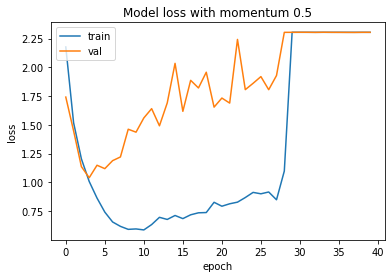

In [309]:
plt.plot(history_sgd_mom_05['loss'])
plt.plot(history_sgd_mom_05['val_loss'])
plt.title('Model loss with momentum 0.5')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [310]:
history_sgd_mom_1 = pickle.load(open('../data/models/trainHistory_model_sgd_mom_1.p', 'rb'))

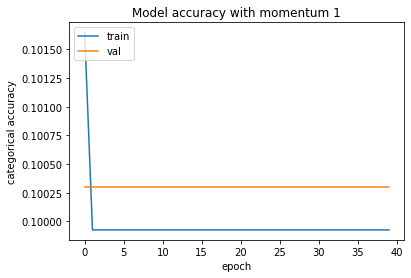

In [311]:
plt.plot(history_sgd_mom_1['categorical_accuracy'])
plt.plot(history_sgd_mom_1['val_categorical_accuracy'])
plt.title('Model accuracy with momentum 1')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

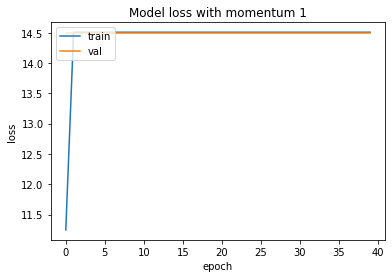

In [312]:
plt.plot(history_sgd_mom_1['loss'])
plt.plot(history_sgd_mom_1['val_loss'])
plt.title('Model loss with momentum 1')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [313]:
df_mom_sgd_0 = prepare_plot_percentage_epoch(history_sgd, model_name='SGD_mom_0.0')
df_mom_sgd_005 = prepare_plot_percentage_epoch(history_sgd_mom_005, model_name='SGD_mom_0.05')
df_mom_sgd_01 = prepare_plot_percentage_epoch(history_sgd_mom_01, model_name='SGD_mom_0.1')
df_mom_sgd_05 = prepare_plot_percentage_epoch(history_sgd_mom_05, model_name='SGD_mom_0.5')
#df_mom_sgd_1 = prepare_plot_percentage_epoch(history_sgd_mom_1, model_name='SGD_mom_1.0')

df_to_plot_mom = pd.concat([df_mom_sgd_0, df_mom_sgd_005, df_mom_sgd_01, df_mom_sgd_05])#, df_mom_sgd_1])

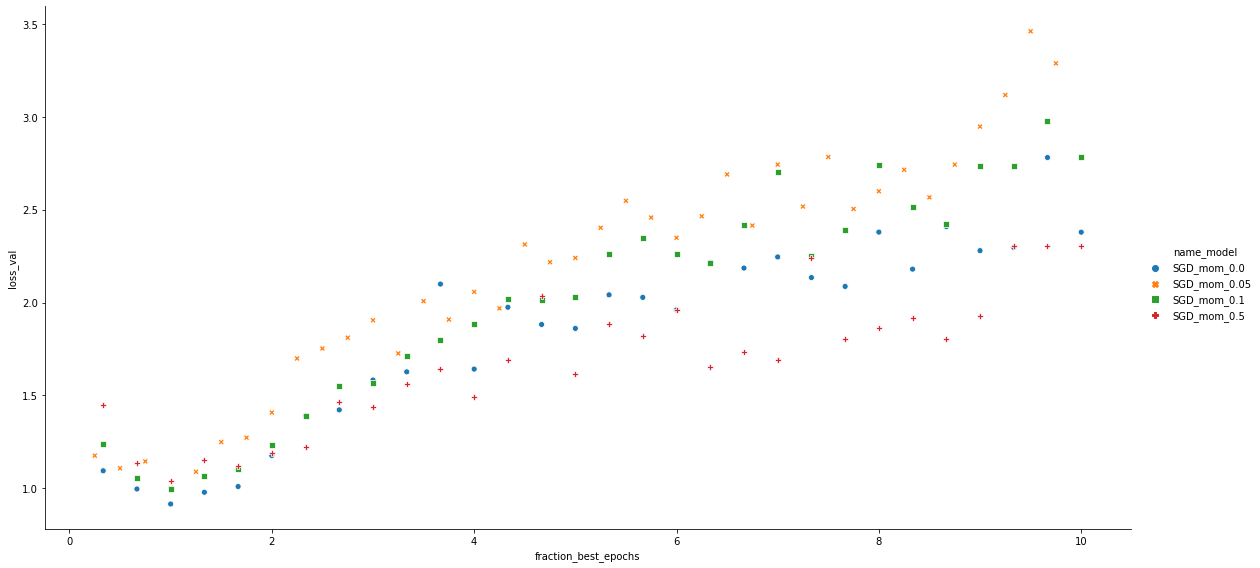

In [314]:
sns.relplot(x='fraction_best_epochs', y='loss_val', hue='name_model',
            style='name_model', #kind='line',
            data=df_to_plot_mom[df_to_plot_mom['fraction_best_epochs'] <= 10], height=8, aspect=2.)

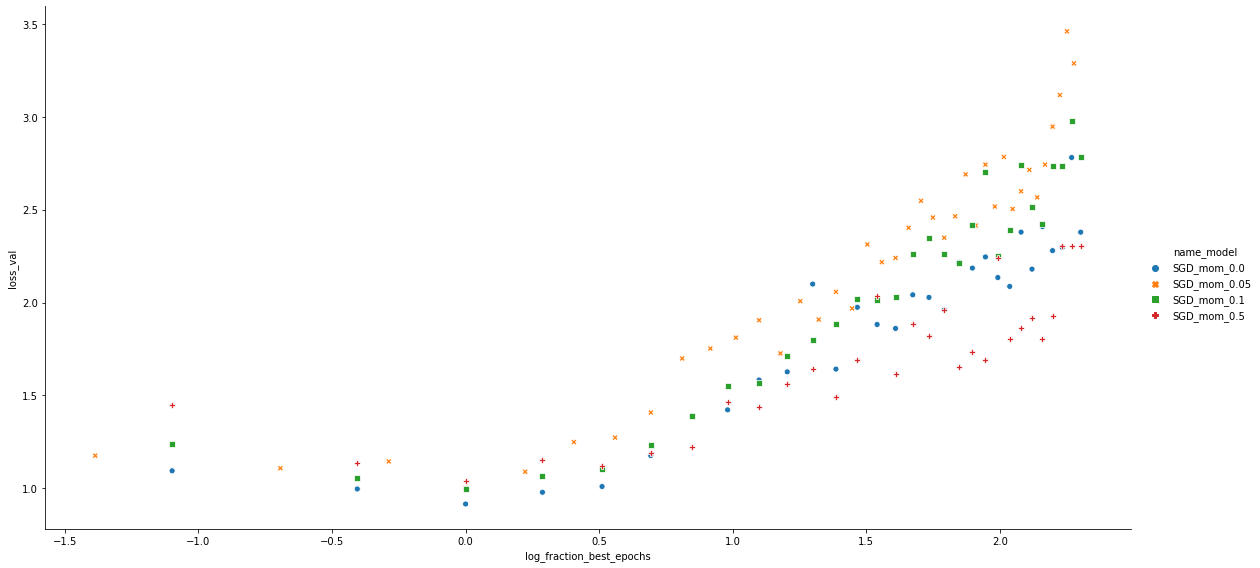

In [315]:
sns.relplot(x='log_fraction_best_epochs', y='loss_val', hue='name_model',
            style='name_model', #kind='line',
            data=df_to_plot_mom[df_to_plot_mom['fraction_best_epochs'] <= 10], height=8, aspect=2.)

## Learning rate

In [316]:
history_sgd_lr_0001 = pickle.load(open('../data/models/trainHistory_model_sgd_lr_0001.p', 'rb'))

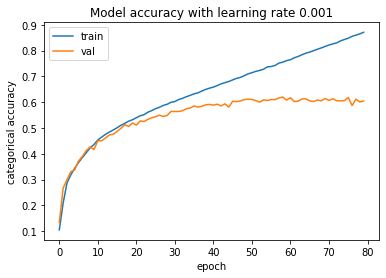

In [317]:
plt.plot(history_sgd_lr_0001['categorical_accuracy'])
plt.plot(history_sgd_lr_0001['val_categorical_accuracy'])
plt.title('Model accuracy with learning rate 0.001')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

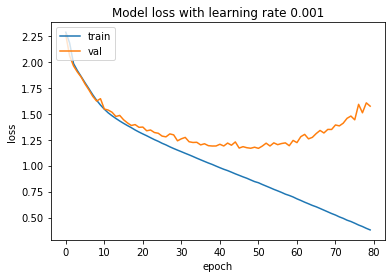

In [318]:
plt.plot(history_sgd_lr_0001['loss'])
plt.plot(history_sgd_lr_0001['val_loss'])
plt.title('Model loss with learning rate 0.001')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [319]:
history_sgd_lr_0005 = pickle.load(open('../data/models/trainHistory_model_sgd_lr_0005.p', 'rb'))

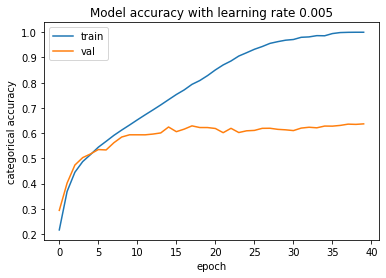

In [320]:
plt.plot(history_sgd_lr_0005['categorical_accuracy'])
plt.plot(history_sgd_lr_0005['val_categorical_accuracy'])
plt.title('Model accuracy with learning rate 0.005')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

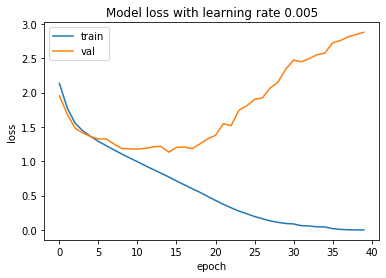

In [321]:
plt.plot(history_sgd_lr_0005['loss'])
plt.plot(history_sgd_lr_0005['val_loss'])
plt.title('Model loss with learning rate 0.005')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [322]:
history_sgd_lr_001 = pickle.load(open('../data/models/trainHistory_model_sgd_lr_001.p', 'rb'))

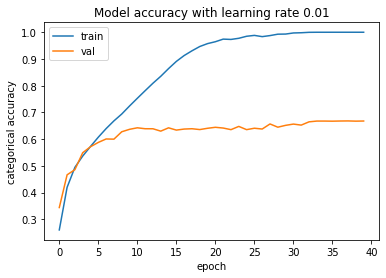

In [323]:
plt.plot(history_sgd_lr_001['categorical_accuracy'])
plt.plot(history_sgd_lr_001['val_categorical_accuracy'])
plt.title('Model accuracy with learning rate 0.01')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

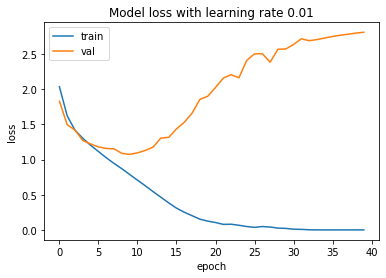

In [324]:
plt.plot(history_sgd_lr_001['loss'])
plt.plot(history_sgd_lr_001['val_loss'])
plt.title('Model loss with learning rate 0.01')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [325]:
history_sgd_lr_005 = pickle.load(open('../data/models/trainHistory_model_sgd_lr_005.p', 'rb'))

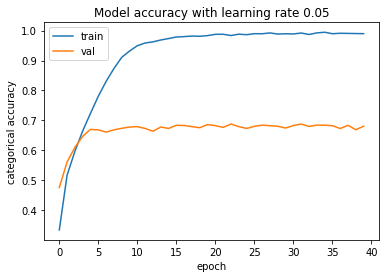

In [326]:
plt.plot(history_sgd_lr_005['categorical_accuracy'])
plt.plot(history_sgd_lr_005['val_categorical_accuracy'])
plt.title('Model accuracy with learning rate 0.05')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

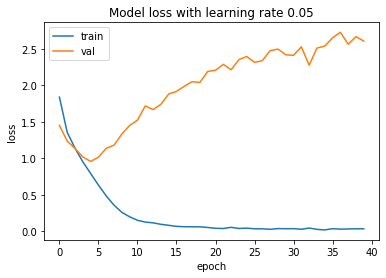

In [327]:
plt.plot(history_sgd_lr_005['loss'])
plt.plot(history_sgd_lr_005['val_loss'])
plt.title('Model loss with learning rate 0.05')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [328]:
history_sgd_lr_05 = pickle.load(open('../data/models/trainHistory_model_sgd_lr_05.p', 'rb'))

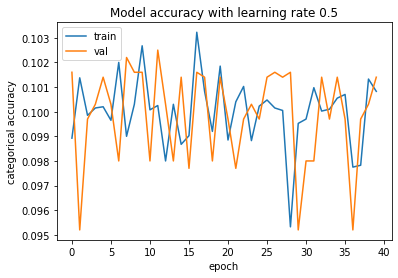

In [329]:
plt.plot(history_sgd_lr_05['categorical_accuracy'])
plt.plot(history_sgd_lr_05['val_categorical_accuracy'])
plt.title('Model accuracy with learning rate 0.5')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

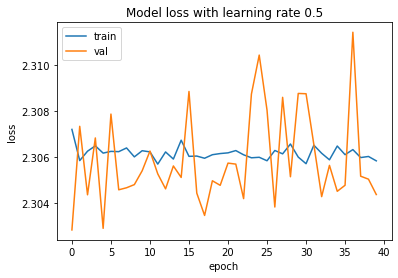

In [330]:
plt.plot(history_sgd_lr_05['loss'])
plt.plot(history_sgd_lr_05['val_loss'])
plt.title('Model loss with learning rate 0.5')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [331]:
values_param_lr = []
values_best_loss_lr = []

values_param_lr.append(.001)
values_best_loss_lr.append(min(history_sgd_lr_0001['val_loss']))

values_param_lr.append(.005)
values_best_loss_lr.append(min(history_sgd_lr_0005['val_loss']))

values_param_lr.append(.01)
values_best_loss_lr.append(min(history_sgd_lr_001['val_loss']))

values_param_lr.append(.05)
values_best_loss_lr.append(min(history_sgd_lr_005['val_loss']))

values_param_lr.append(.1)
values_best_loss_lr.append(min(history_sgd['val_loss']))

values_param_lr.append(.5)
values_best_loss_lr.append(min(history_sgd_lr_05['val_loss']))

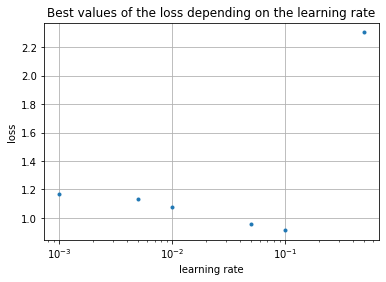

In [332]:
plt.semilogx(values_param_lr, values_best_loss_lr, '.')
plt.title('Best values of the loss depending on the learning rate')
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.grid(True)
plt.show()

In [333]:
df_sgd_lr_0001 = prepare_plot_percentage_epoch(history_sgd_lr_0001, model_name='SGD_lr_0.001')
df_sgd_lr_0005 = prepare_plot_percentage_epoch(history_sgd_lr_0005, model_name='SGD_lr_0.005')
df_sgd_lr_001 = prepare_plot_percentage_epoch(history_sgd_lr_001, model_name='SGD_lr_0.01')
df_sgd_lr_005 = prepare_plot_percentage_epoch(history_sgd_lr_005, model_name='SGD_lr_0.05')
df_sgd_lr_01 = prepare_plot_percentage_epoch(history_sgd, model_name='SGD_lr_0.1')
df_sgd_lr_05 = prepare_plot_percentage_epoch(history_sgd_lr_05, model_name='SGD_lr_0.5')

df_to_plot_lr = pd.concat([df_sgd_lr_0001, df_sgd_lr_0005, df_sgd_lr_001, df_sgd_lr_005, df_sgd_lr_01, df_sgd_lr_05])

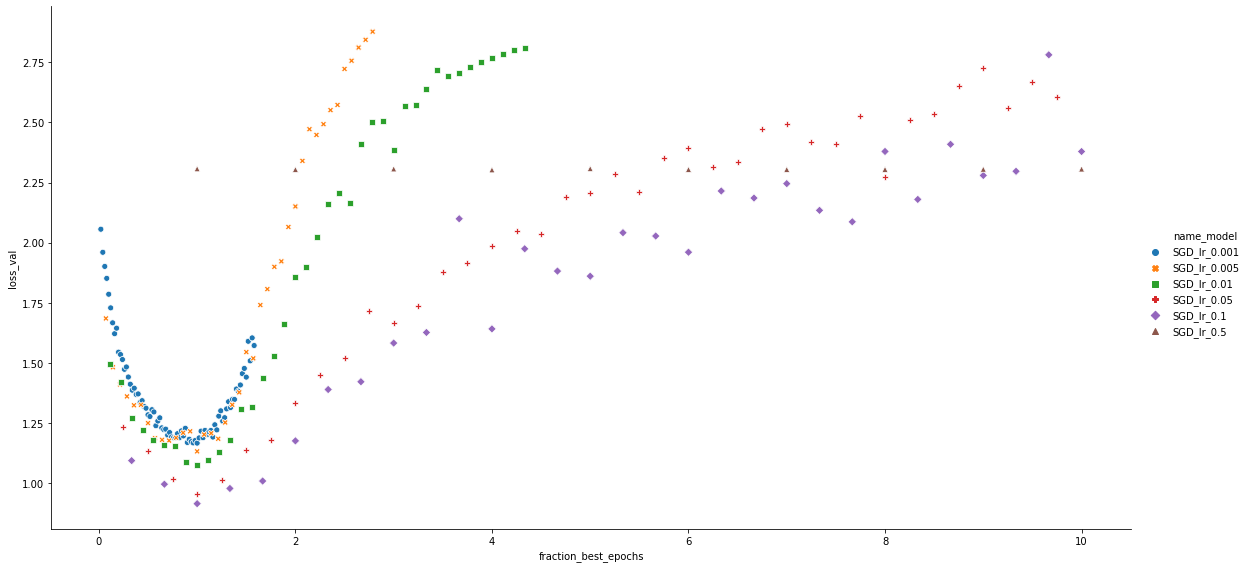

In [334]:
sns.relplot(x='fraction_best_epochs', y='loss_val', hue='name_model',
            style='name_model', #kind='line',
            data=df_to_plot_lr[df_to_plot_lr['fraction_best_epochs'] <= 10], height=8, aspect=2.)

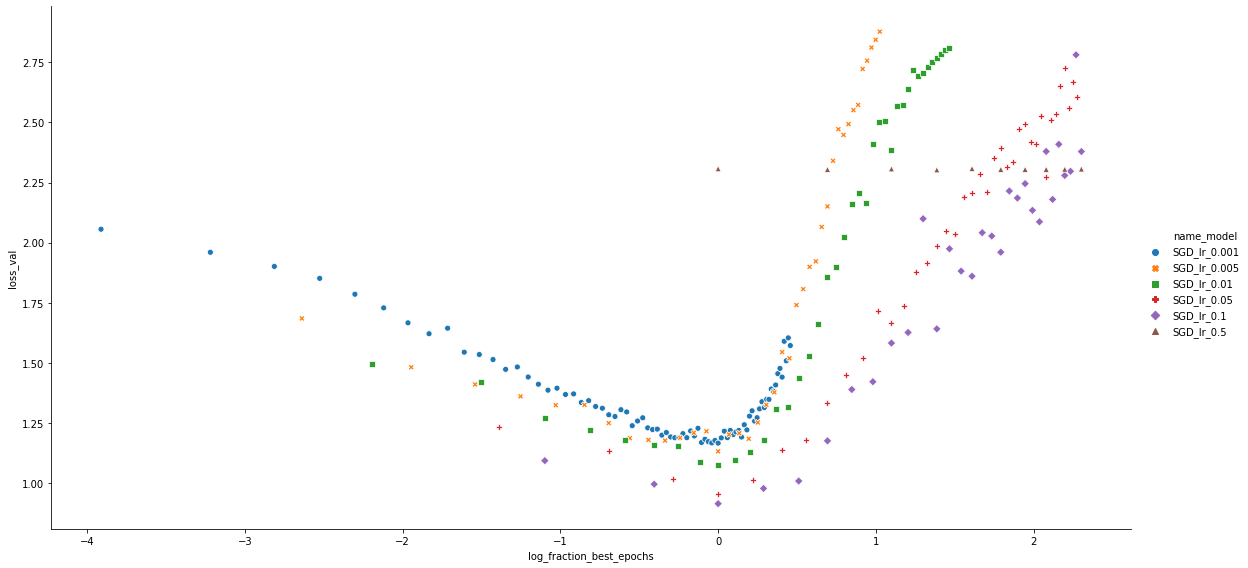

In [335]:
sns.relplot(x='log_fraction_best_epochs', y='loss_val', hue='name_model',
            style='name_model', #kind='line',
            data=df_to_plot_lr[df_to_plot_lr['fraction_best_epochs'] <= 10], height=8, aspect=2.)

## Batch normalization

In [336]:
history_gd_batchn = pickle.load(open('../data/models/trainHistory_model_gd_batchn.p', 'rb'))

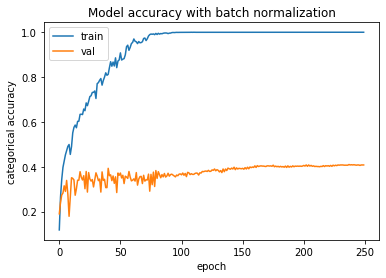

In [337]:
plt.plot(history_gd_batchn['categorical_accuracy'])
plt.plot(history_gd_batchn['val_categorical_accuracy'])
plt.title('Model accuracy with batch normalization')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

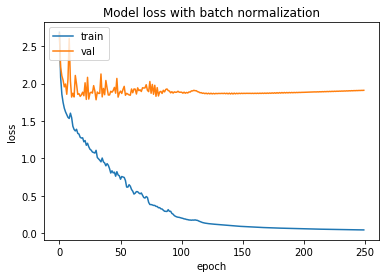

In [338]:
plt.plot(history_gd_batchn['loss'])
plt.plot(history_gd_batchn['val_loss'])
plt.title('Model loss with batch normalization')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [339]:
history_sgd_batchn = pickle.load(open('../data/models/trainHistory_model_sgd_batchn.p', 'rb'))

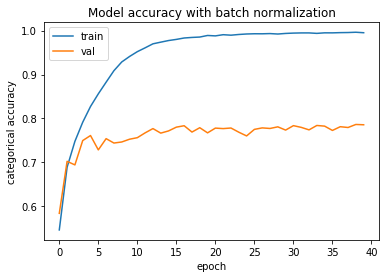

In [340]:
plt.plot(history_sgd_batchn['categorical_accuracy'])
plt.plot(history_sgd_batchn['val_categorical_accuracy'])
plt.title('Model accuracy with batch normalization')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

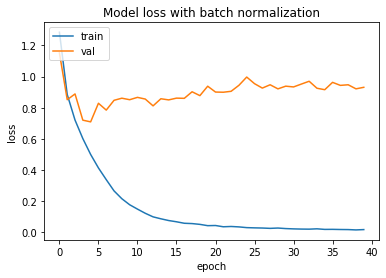

In [341]:
plt.plot(history_sgd_batchn['loss'])
plt.plot(history_sgd_batchn['val_loss'])
plt.title('Model loss with batch normalization')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

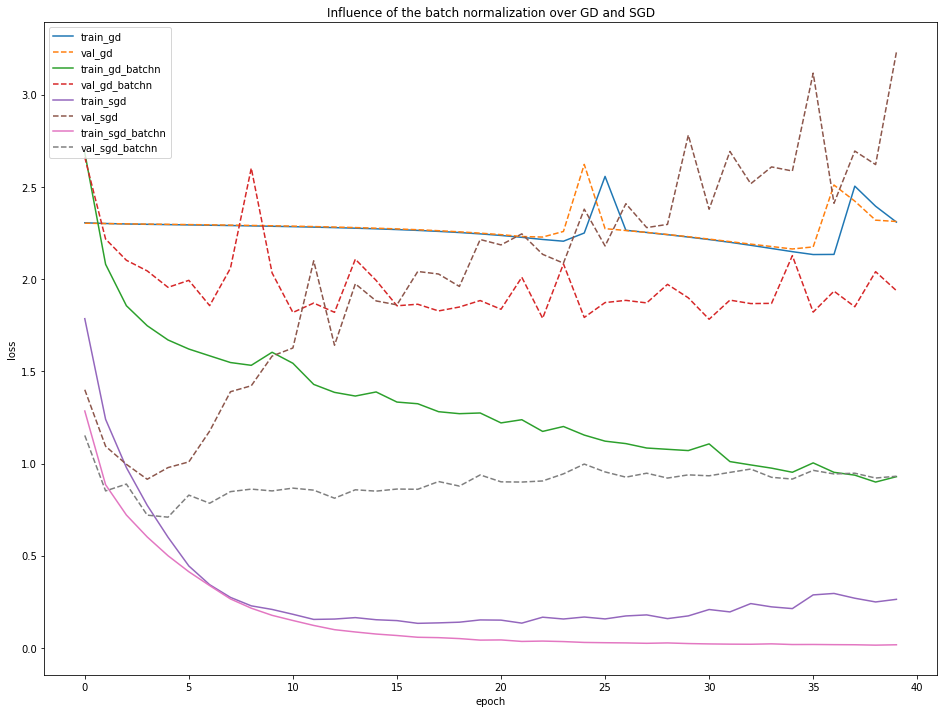

In [342]:
# Compare the influence of batch normalization
plt.figure(figsize=(16,12))
plt.plot(history_gd['loss'][:40])
plt.plot(history_gd['val_loss'][:40], '--')
plt.plot(history_gd_batchn['loss'][:40])
plt.plot(history_gd_batchn['val_loss'][:40], '--')
plt.plot(history_sgd['loss'][:40])
plt.plot(history_sgd['val_loss'][:40], '--')
plt.plot(history_sgd_batchn['loss'])
plt.plot(history_sgd_batchn['val_loss'], '--')
plt.title('Influence of the batch normalization over GD and SGD')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_gd', 'val_gd', 'train_gd_batchn', 'val_gd_batchn',
           'train_sgd', 'val_sgd', 'train_sgd_batchn', 'val_sgd_batchn'],
           loc='upper left')
plt.show()

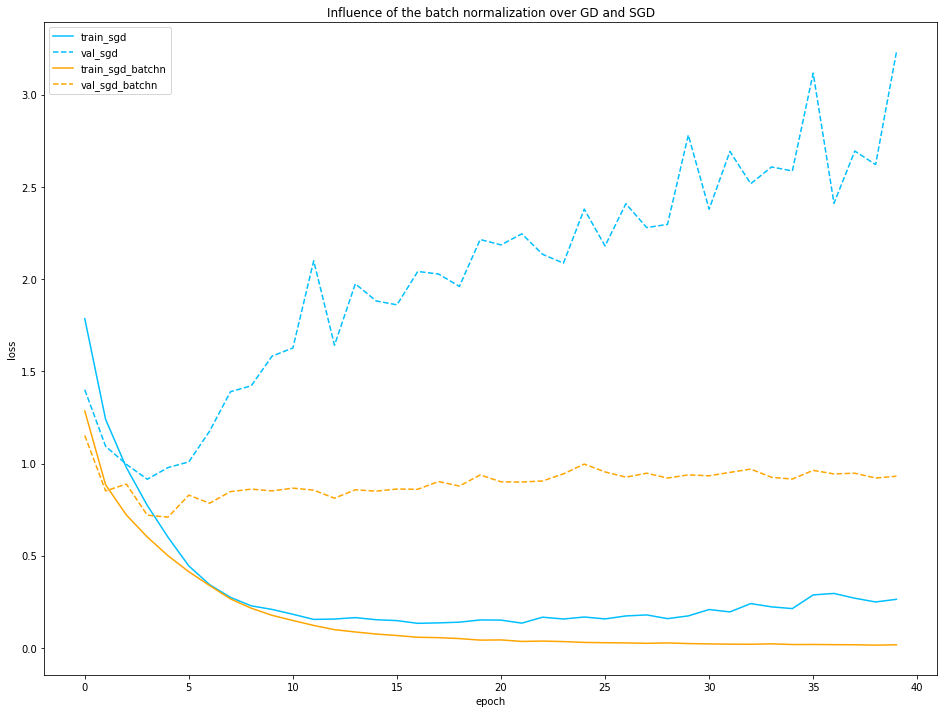

In [343]:
# Compare the influence of batch normalization without GD
plt.figure(figsize=(16,12))
plt.plot(history_sgd['loss'][:40], color='deepskyblue')
plt.plot(history_sgd['val_loss'][:40], '--', color='deepskyblue')
plt.plot(history_sgd_batchn['loss'], color='orange')
plt.plot(history_sgd_batchn['val_loss'], '--', color='orange')
plt.title('Influence of the batch normalization over GD and SGD')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_sgd', 'val_sgd', 'train_sgd_batchn', 'val_sgd_batchn'],
           loc='upper left')
plt.show()

In [344]:
df_batchn_gd = prepare_plot_percentage_epoch(history_gd, model_name='GD')
df_batchn_sgd = prepare_plot_percentage_epoch(history_sgd, model_name='SGD')
df_batchn_gd_w_batchn = prepare_plot_percentage_epoch(history_gd_batchn, model_name='GD_w_batchnorm')
df_batchn_sgd_w_batchn = prepare_plot_percentage_epoch(history_sgd_batchn, model_name='SGD_w_batchnorm')

df_to_plot_bn = pd.concat([df_batchn_gd, df_batchn_sgd, df_batchn_gd_w_batchn, df_batchn_sgd_w_batchn])

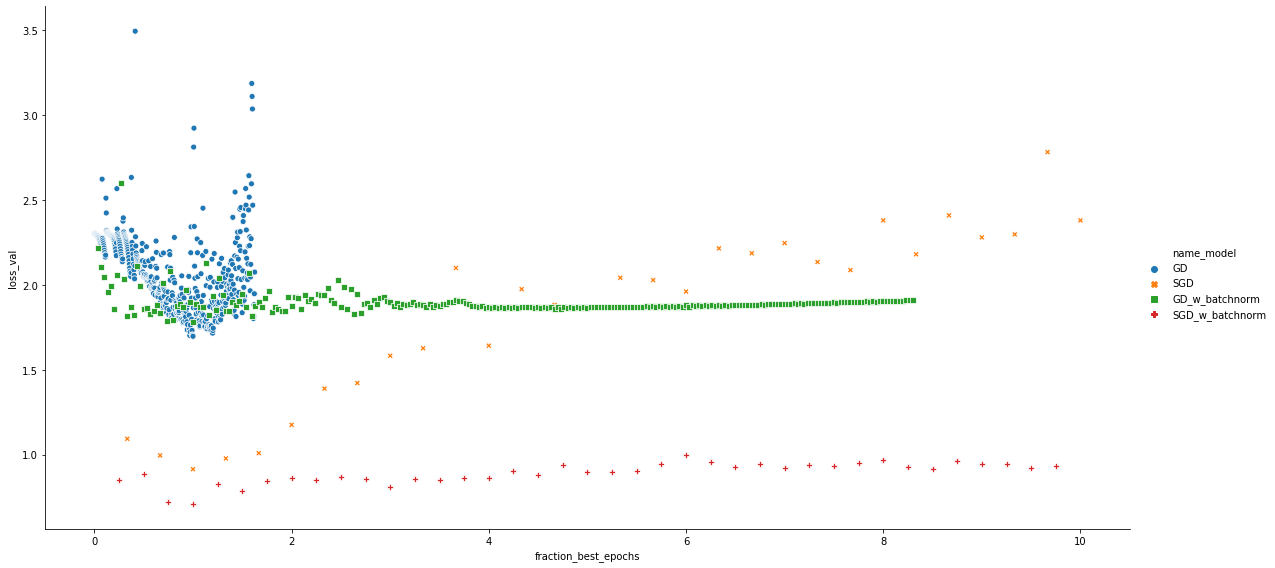

In [345]:
sns.relplot(x='fraction_best_epochs', y='loss_val', hue='name_model',
            style='name_model', #kind='line',
            data=df_to_plot_bn[df_to_plot_bn['fraction_best_epochs'] <= 10], height=8, aspect=2.)

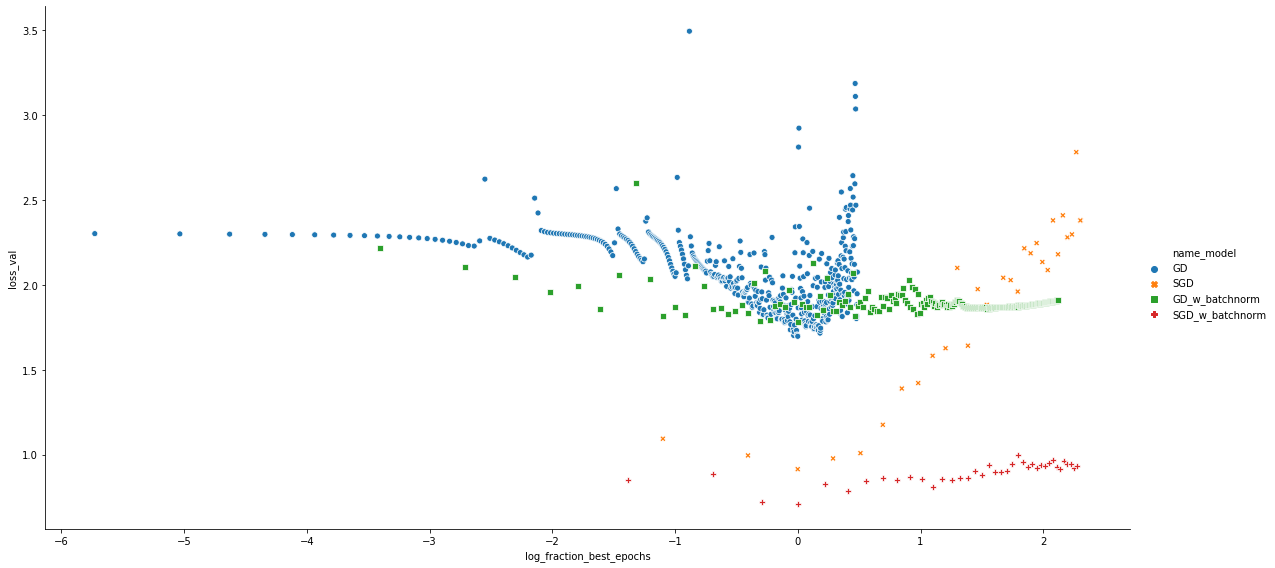

In [346]:
sns.relplot(x='log_fraction_best_epochs', y='loss_val', hue='name_model',
            style='name_model', #kind='line',
            data=df_to_plot_bn[df_to_plot_bn['fraction_best_epochs'] <= 10], height=8, aspect=2.)

In [347]:
df_batchn_sgd = prepare_plot_percentage_epoch(history_sgd, model_name='SGD')
df_batchn_sgd_w_batchn = prepare_plot_percentage_epoch(history_sgd_batchn, model_name='SGD_w_batchnorm')

df_to_plot_sgd_bn = pd.concat([df_batchn_sgd, df_batchn_sgd_w_batchn])

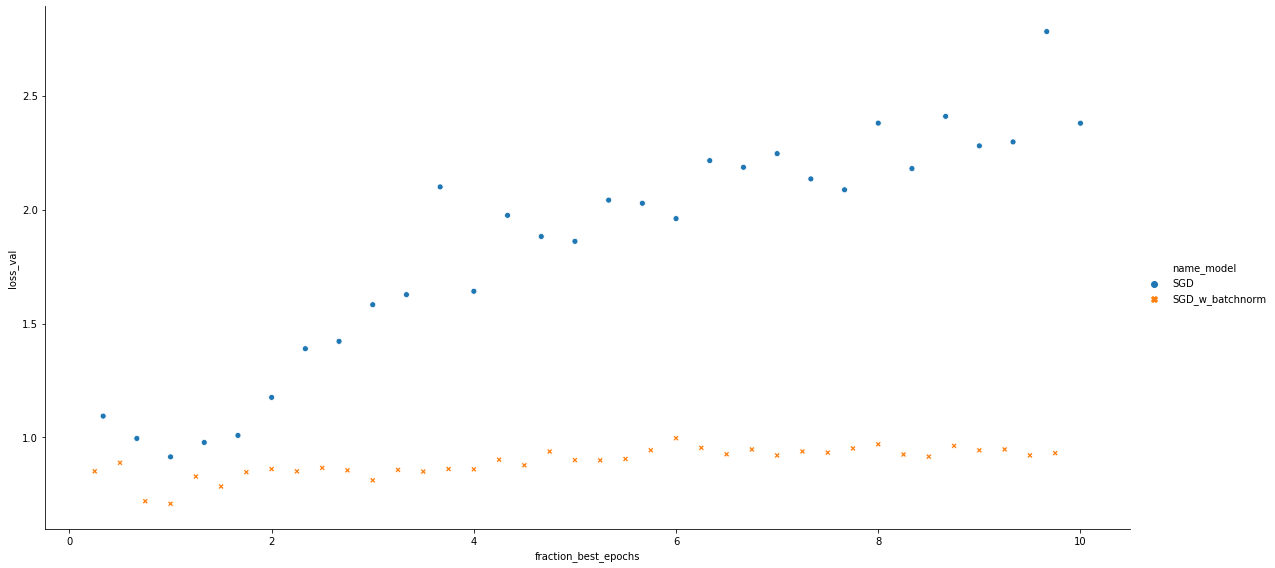

In [348]:
sns.relplot(x='fraction_best_epochs', y='loss_val', hue='name_model',
            style='name_model', #kind='line',
            data=df_to_plot_sgd_bn[df_to_plot_sgd_bn['fraction_best_epochs'] <= 10], height=8, aspect=2.)

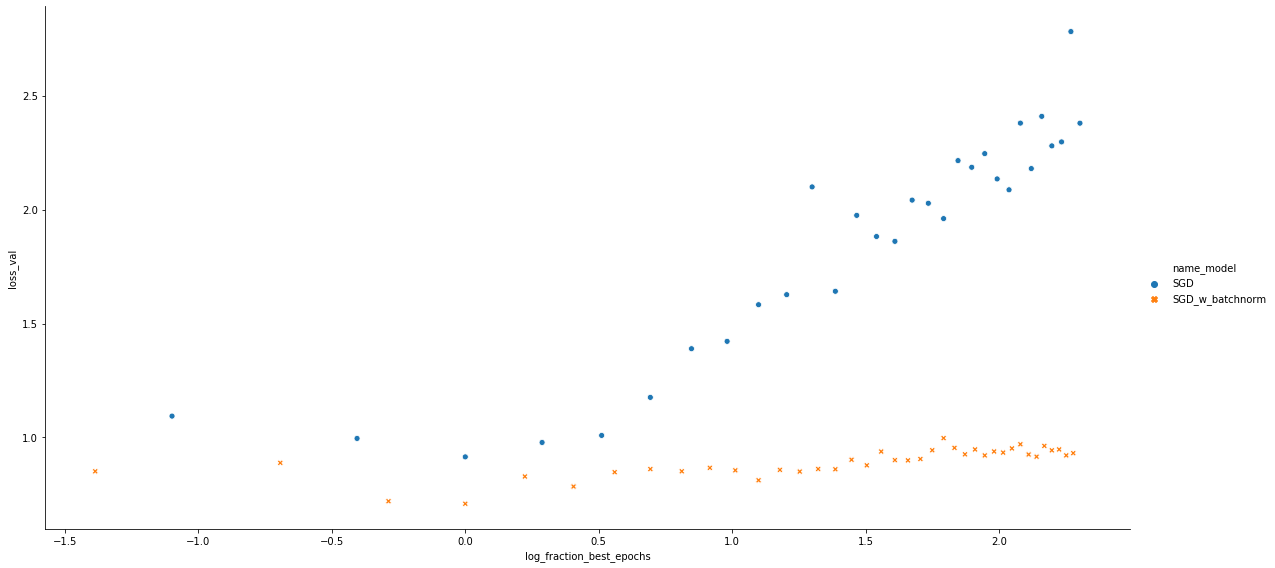

In [349]:
sns.relplot(x='log_fraction_best_epochs', y='loss_val', hue='name_model',
            style='name_model', #kind='line',
            data=df_to_plot_sgd_bn[df_to_plot_sgd_bn['fraction_best_epochs'] <= 10], height=8, aspect=2.)

## Architecture

In [350]:
history_sgd_arch1 = pickle.load(open('../data/models/trainHistory_model_sgd_arch1.p', 'rb'))

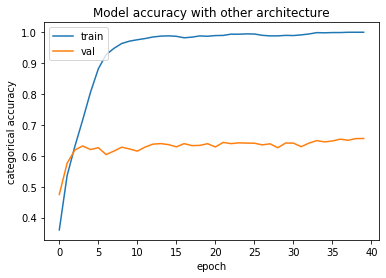

In [351]:
plt.plot(history_sgd_arch1['categorical_accuracy'])
plt.plot(history_sgd_arch1['val_categorical_accuracy'])
plt.title('Model accuracy with other architecture')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

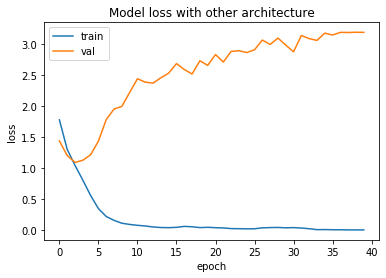

In [352]:
plt.plot(history_sgd_arch1['loss'])
plt.plot(history_sgd_arch1['val_loss'])
plt.title('Model loss with other architecture')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [353]:
history_sgd_arch3 = pickle.load(open('../data/models/trainHistory_model_sgd_arch3.p', 'rb'))

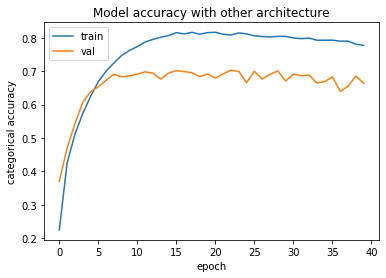

In [354]:
plt.plot(history_sgd_arch3['categorical_accuracy'])
plt.plot(history_sgd_arch3['val_categorical_accuracy'])
plt.title('Model accuracy with other architecture')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

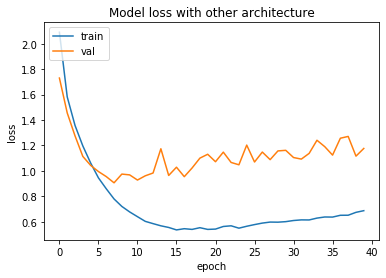

In [355]:
plt.plot(history_sgd_arch3['loss'])
plt.plot(history_sgd_arch3['val_loss'])
plt.title('Model loss with other architecture')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [356]:
history_sgd_arch4 = pickle.load(open('../data/models/trainHistory_model_sgd_arch4.p', 'rb'))

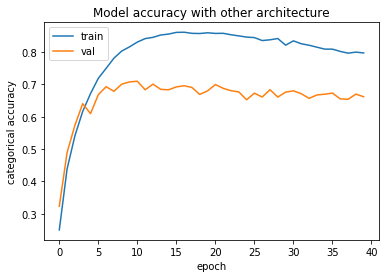

In [357]:
plt.plot(history_sgd_arch4['categorical_accuracy'])
plt.plot(history_sgd_arch4['val_categorical_accuracy'])
plt.title('Model accuracy with other architecture')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

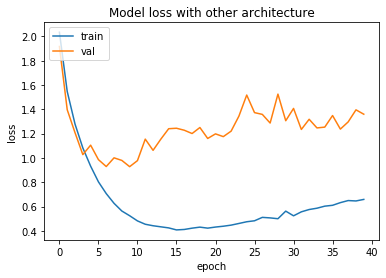

In [358]:
plt.plot(history_sgd_arch4['loss'])
plt.plot(history_sgd_arch4['val_loss'])
plt.title('Model loss with other architecture')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

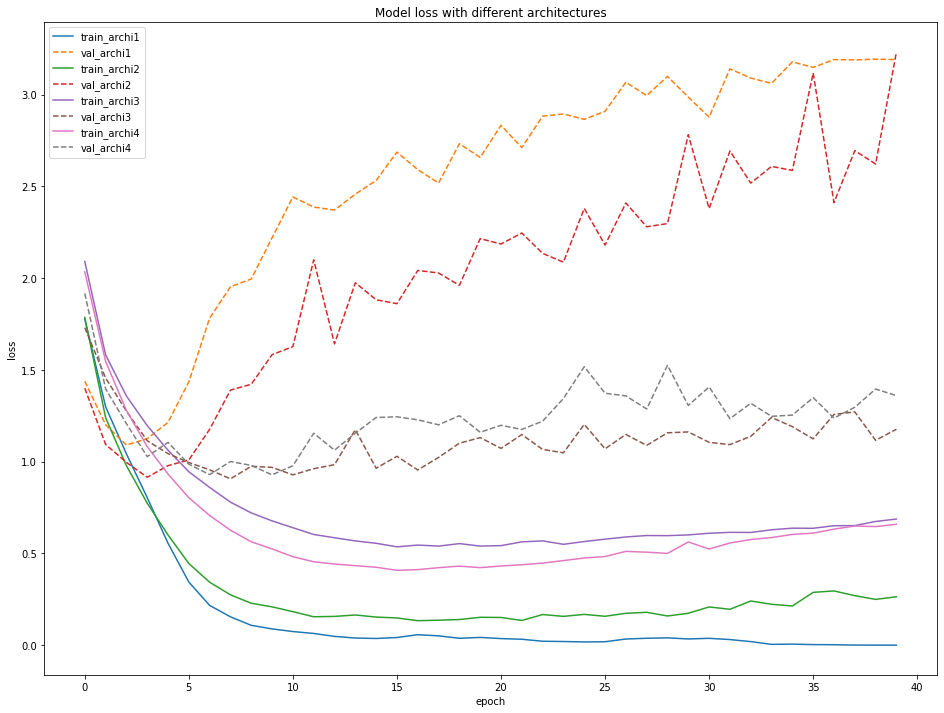

In [359]:
# Compare all architectures
plt.figure(figsize=(16,12))
plt.plot(history_sgd_arch1['loss'])
plt.plot(history_sgd_arch1['val_loss'], '--')
plt.plot(history_sgd['loss'][:40])
plt.plot(history_sgd['val_loss'][:40], '--')
plt.plot(history_sgd_arch3['loss'])
plt.plot(history_sgd_arch3['val_loss'], '--')
plt.plot(history_sgd_arch4['loss'])
plt.plot(history_sgd_arch4['val_loss'], '--')
plt.title('Model loss with different architectures')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_archi1', 'val_archi1', 'train_archi2', 'val_archi2',
           'train_archi3', 'val_archi3', 'train_archi4', 'val_archi4'],
           loc='best')
plt.show()

In [360]:
df_arch_sgd_arch1 = prepare_plot_percentage_epoch(history_sgd_arch1, model_name='SGD_arch1')
df_arch_sgd_arch2 = prepare_plot_percentage_epoch(history_sgd, model_name='SGD_arch2')
df_arch_sgd_arch3 = prepare_plot_percentage_epoch(history_sgd_arch3, model_name='SGD_arch3')
df_arch_sgd_arch4 = prepare_plot_percentage_epoch(history_sgd_arch4, model_name='SGD_arch4')

df_to_plot_arch = pd.concat([df_arch_sgd_arch1, df_arch_sgd_arch2, df_arch_sgd_arch3, df_arch_sgd_arch4])

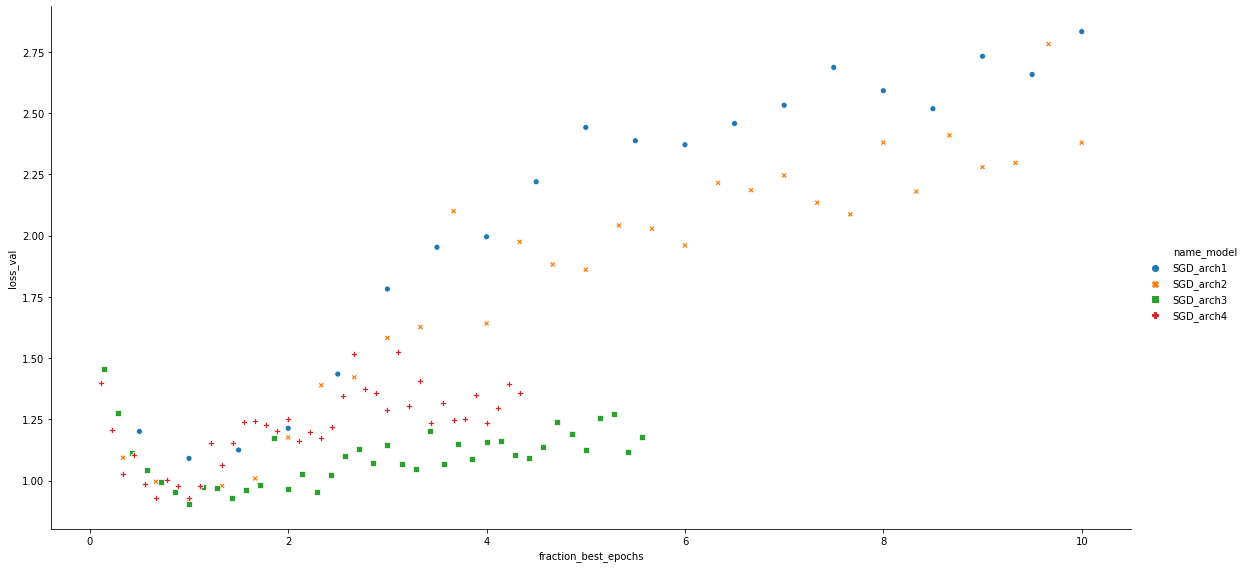

In [361]:
sns.relplot(x='fraction_best_epochs', y='loss_val', hue='name_model',
            style='name_model', #kind='line',
            data=df_to_plot_arch[df_to_plot_arch['fraction_best_epochs'] <= 10], height=8, aspect=2.)

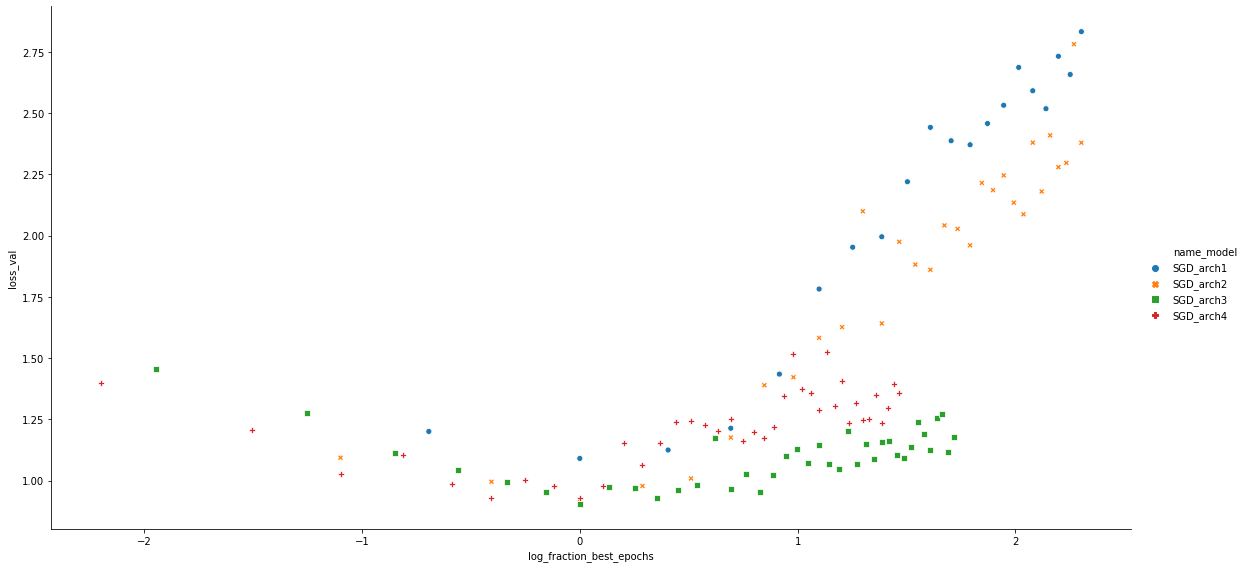

In [362]:
sns.relplot(x='log_fraction_best_epochs', y='loss_val', hue='name_model',
            style='name_model', #kind='line',
            data=df_to_plot_arch[df_to_plot_arch['fraction_best_epochs'] <= 10], height=8, aspect=2.)

## Dropout

In [363]:
history_sgd_drop_01 = pickle.load(open('../data/models/trainHistory_model_sgd_drop_01.p', 'rb'))

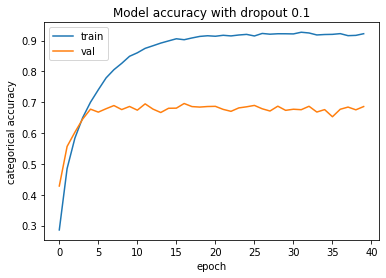

In [364]:
plt.plot(history_sgd_drop_01['categorical_accuracy'])
plt.plot(history_sgd_drop_01['val_categorical_accuracy'])
plt.title('Model accuracy with dropout 0.1')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

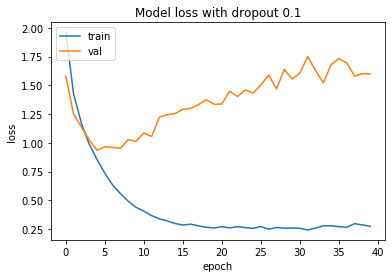

In [365]:
plt.plot(history_sgd_drop_01['loss'])
plt.plot(history_sgd_drop_01['val_loss'])
plt.title('Model loss with dropout 0.1')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [366]:
history_sgd_drop_02 = pickle.load(open('../data/models/trainHistory_model_sgd_drop_02.p', 'rb'))

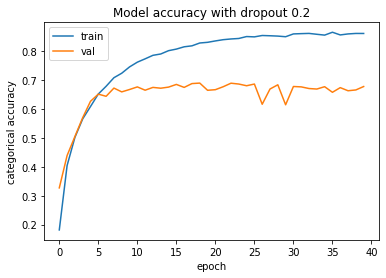

In [367]:
plt.plot(history_sgd_drop_02['categorical_accuracy'])
plt.plot(history_sgd_drop_02['val_categorical_accuracy'])
plt.title('Model accuracy with dropout 0.2')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

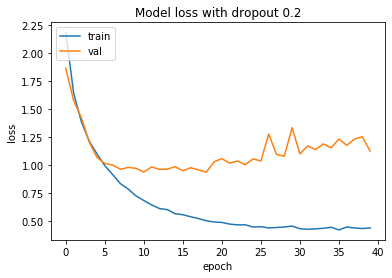

In [368]:
plt.plot(history_sgd_drop_02['loss'])
plt.plot(history_sgd_drop_02['val_loss'])
plt.title('Model loss with dropout 0.2')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [369]:
history_sgd_drop_03 = pickle.load(open('../data/models/trainHistory_model_sgd_drop_03.p', 'rb'))

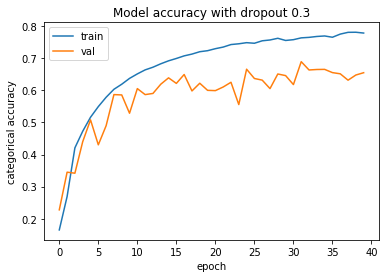

In [370]:
plt.plot(history_sgd_drop_03['categorical_accuracy'])
plt.plot(history_sgd_drop_03['val_categorical_accuracy'])
plt.title('Model accuracy with dropout 0.3')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

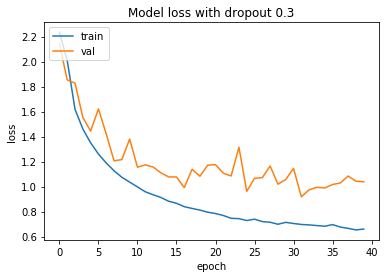

In [371]:
plt.plot(history_sgd_drop_03['loss'])
plt.plot(history_sgd_drop_03['val_loss'])
plt.title('Model loss with dropout 0.3')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [372]:
history_sgd_drop_04 = pickle.load(open('../data/models/trainHistory_model_sgd_drop_04.p', 'rb'))

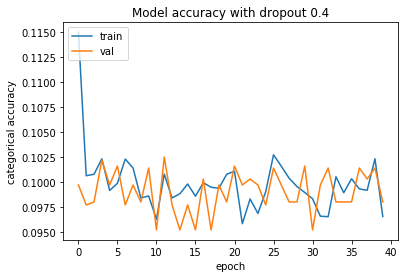

In [373]:
plt.plot(history_sgd_drop_04['categorical_accuracy'])
plt.plot(history_sgd_drop_04['val_categorical_accuracy'])
plt.title('Model accuracy with dropout 0.4')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

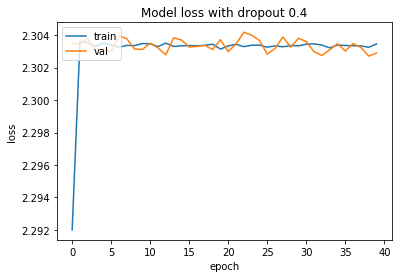

In [374]:
plt.plot(history_sgd_drop_04['loss'])
plt.plot(history_sgd_drop_04['val_loss'])
plt.title('Model loss with dropout 0.4')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [375]:
history_sgd_drop_05 = pickle.load(open('../data/models/trainHistory_model_sgd_drop_05.p', 'rb'))

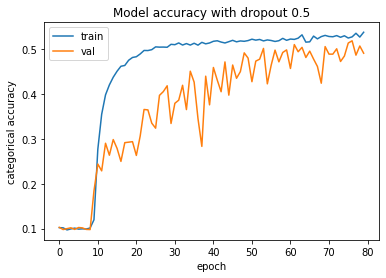

In [376]:
plt.plot(history_sgd_drop_05['categorical_accuracy'])
plt.plot(history_sgd_drop_05['val_categorical_accuracy'])
plt.title('Model accuracy with dropout 0.5')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

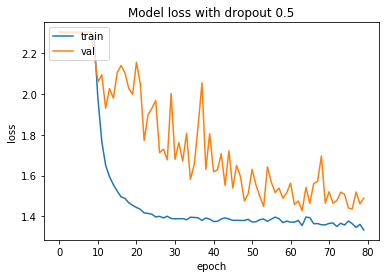

In [377]:
plt.plot(history_sgd_drop_05['loss'])
plt.plot(history_sgd_drop_05['val_loss'])
plt.title('Model loss with dropout 0.5')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [378]:
history_sgd_drop_06 = pickle.load(open('../data/models/trainHistory_model_sgd_drop_06.p', 'rb'))

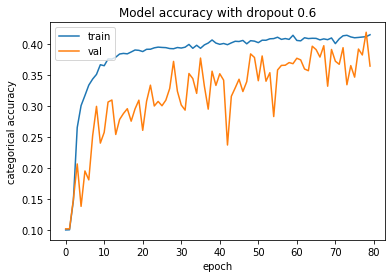

In [379]:
plt.plot(history_sgd_drop_06['categorical_accuracy'])
plt.plot(history_sgd_drop_06['val_categorical_accuracy'])
plt.title('Model accuracy with dropout 0.6')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

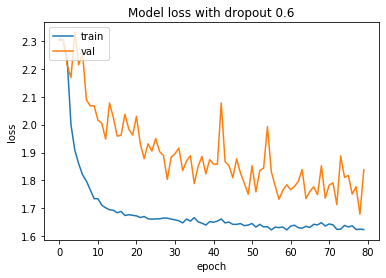

In [380]:
plt.plot(history_sgd_drop_06['loss'])
plt.plot(history_sgd_drop_06['val_loss'])
plt.title('Model loss with dropout 0.6')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

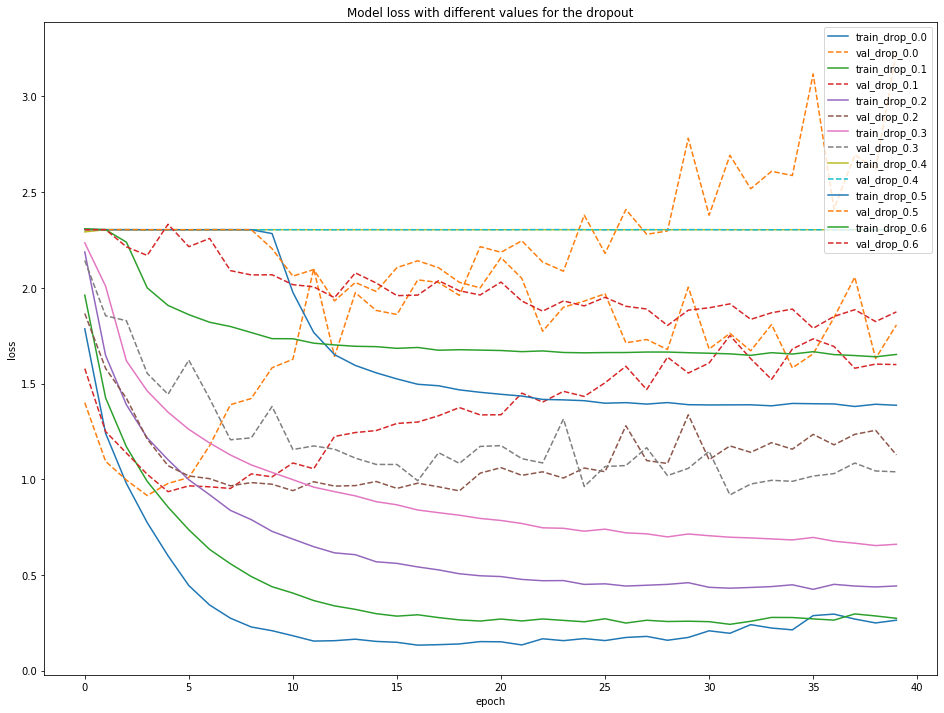

In [381]:
# Compare all dropout values
plt.figure(figsize=(16,12))
plt.plot(history_sgd['loss'][:40])
plt.plot(history_sgd['val_loss'][:40], '--')
plt.plot(history_sgd_drop_01['loss'])
plt.plot(history_sgd_drop_01['val_loss'], '--')
plt.plot(history_sgd_drop_02['loss'])
plt.plot(history_sgd_drop_02['val_loss'], '--')
plt.plot(history_sgd_drop_03['loss'])
plt.plot(history_sgd_drop_03['val_loss'], '--')
plt.plot(history_sgd_drop_04['loss'])
plt.plot(history_sgd_drop_04['val_loss'], '--')
plt.plot(history_sgd_drop_05['loss'][:40])
plt.plot(history_sgd_drop_05['val_loss'][:40], '--')
plt.plot(history_sgd_drop_06['loss'][:40])
plt.plot(history_sgd_drop_06['val_loss'][:40], '--')
plt.title('Model loss with different values for the dropout')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_drop_0.0', 'val_drop_0.0', 'train_drop_0.1', 'val_drop_0.1',
           'train_drop_0.2', 'val_drop_0.2', 'train_drop_0.3', 'val_drop_0.3',
           'train_drop_0.4', 'val_drop_0.4', 'train_drop_0.5', 'val_drop_0.5',
           'train_drop_0.6', 'val_drop_0.6'],
           loc='best')
plt.show()

In [382]:
df_sgd_drop_0 = prepare_plot_percentage_epoch(history_sgd, model_name='SGD_drop_0')
df_sgd_drop_01 = prepare_plot_percentage_epoch(history_sgd_drop_01, model_name='SGD_drop_01')
df_sgd_drop_02 = prepare_plot_percentage_epoch(history_sgd_drop_02, model_name='SGD_drop_02')
df_sgd_drop_03 = prepare_plot_percentage_epoch(history_sgd_drop_03, model_name='SGD_drop_03')
df_sgd_drop_04 = prepare_plot_percentage_epoch(history_sgd_drop_04, model_name='SGD_drop_04')
df_sgd_drop_05 = prepare_plot_percentage_epoch(history_sgd_drop_05, model_name='SGD_drop_05')
df_sgd_drop_06 = prepare_plot_percentage_epoch(history_sgd_drop_06, model_name='SGD_drop_06')

df_to_plot_drop = pd.concat([df_sgd_drop_0, df_sgd_drop_01, df_sgd_drop_02, df_sgd_drop_03,
                             df_sgd_drop_04, df_sgd_drop_05, df_sgd_drop_06])

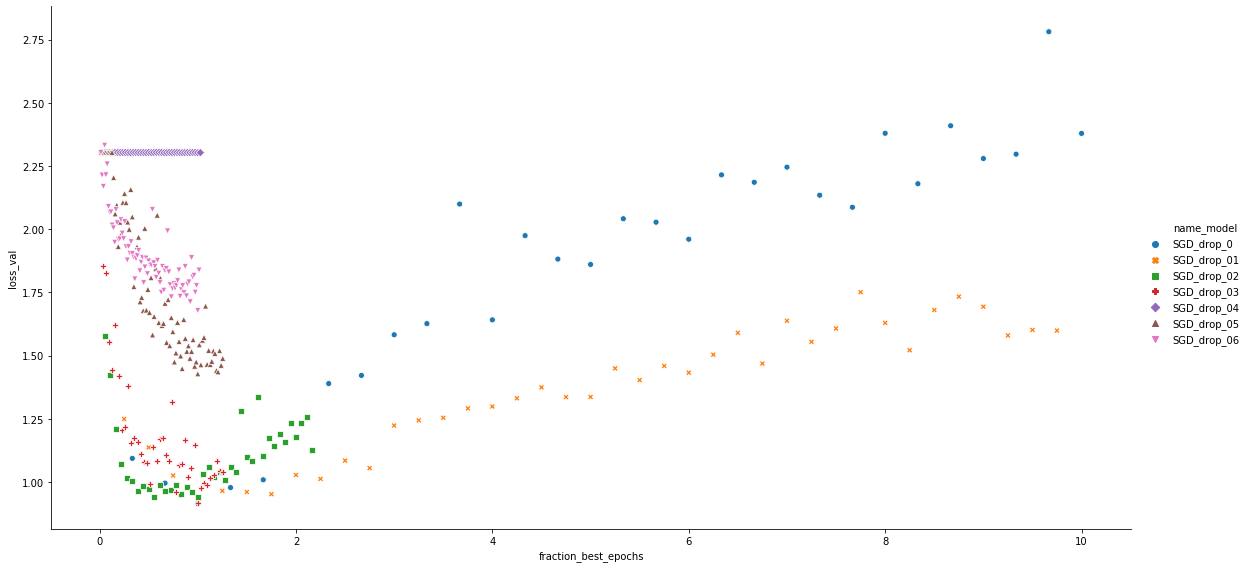

In [383]:
sns.relplot(x='fraction_best_epochs', y='loss_val', hue='name_model',
            style='name_model', #kind='line',
            data=df_to_plot_drop[df_to_plot_drop['fraction_best_epochs'] <= 10], height=8, aspect=2.)

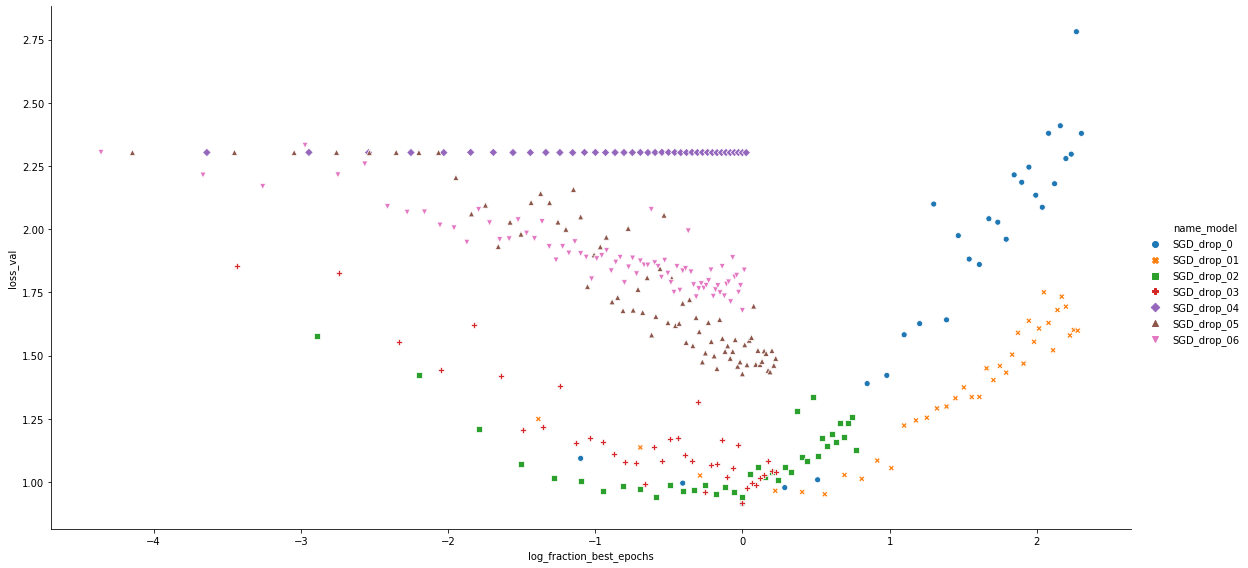

In [384]:
sns.relplot(x='log_fraction_best_epochs', y='loss_val', hue='name_model',
            style='name_model', #kind='line',
            data=df_to_plot_drop[df_to_plot_drop['fraction_best_epochs'] <= 10], height=8, aspect=2.)

## Compare all optimizers

We compare all optimizers using batch normalization and using the test set

In [385]:
history_sgd_final = pickle.load(open('../data/models/trainHistory_model_sgd_final.p', 'rb'))
history_adam_final = pickle.load(open('../data/models/trainHistory_model_adam_final.p', 'rb'))
history_svrg_final = pickle.load(open('../data/models/trainHistory_model_svrg_final.p', 'rb'))

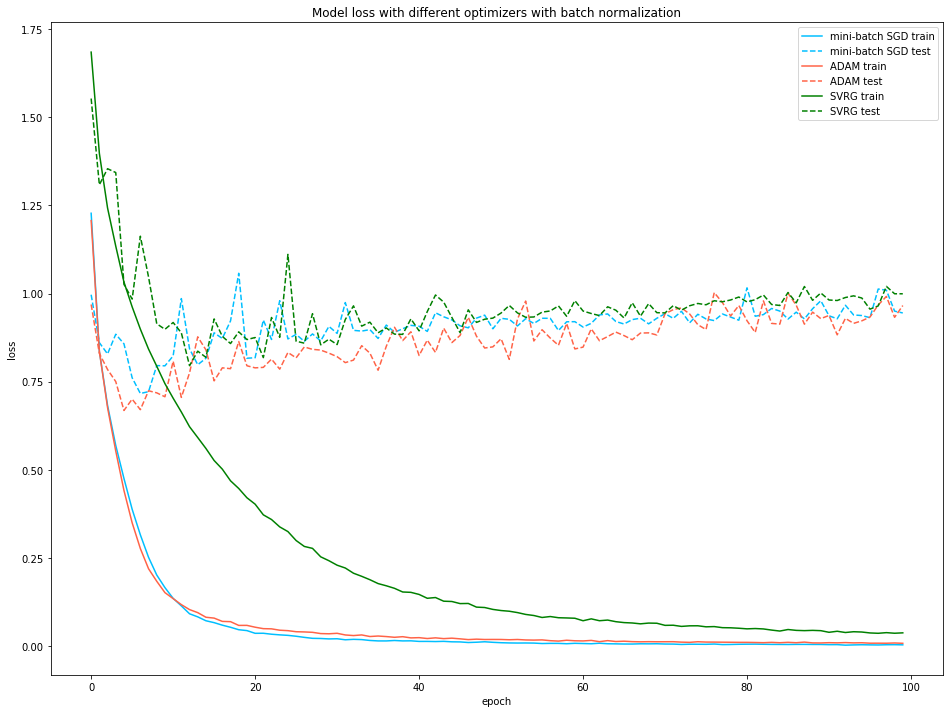

In [391]:
# Compare all dropout values
plt.figure(figsize=(16,12))
plt.plot(history_sgd_final['loss'], color='deepskyblue')
plt.plot(history_sgd_final['val_loss'], '--', color='deepskyblue')
plt.plot(history_adam_final['loss'], color='tomato')
plt.plot(history_adam_final['val_loss'], '--', color='tomato')
plt.plot(history_svrg_final['loss'], color='g')
plt.plot(history_svrg_final['val_loss'], '--', color='g')
plt.title('Model loss with different optimizers with batch normalization')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['mini-batch SGD train', 'mini-batch SGD test', 'ADAM train', 'ADAM test', 'SVRG train', 'SVRG test'])
plt.show()

We now test without batch norm

In [387]:
history_sgd_final_wtht_bn = pickle.load(open('../data/models/trainHistory_model_sgd_final_wtht_bn.p', 'rb'))
history_adam_final_wtht_bn = pickle.load(open('../data/models/trainHistory_model_adam_final_wtht_bn.p', 'rb'))
history_svrg_final_wtht_bn = pickle.load(open('../data/models/trainHistory_model_svrg_final_wtht_bn.p', 'rb'))

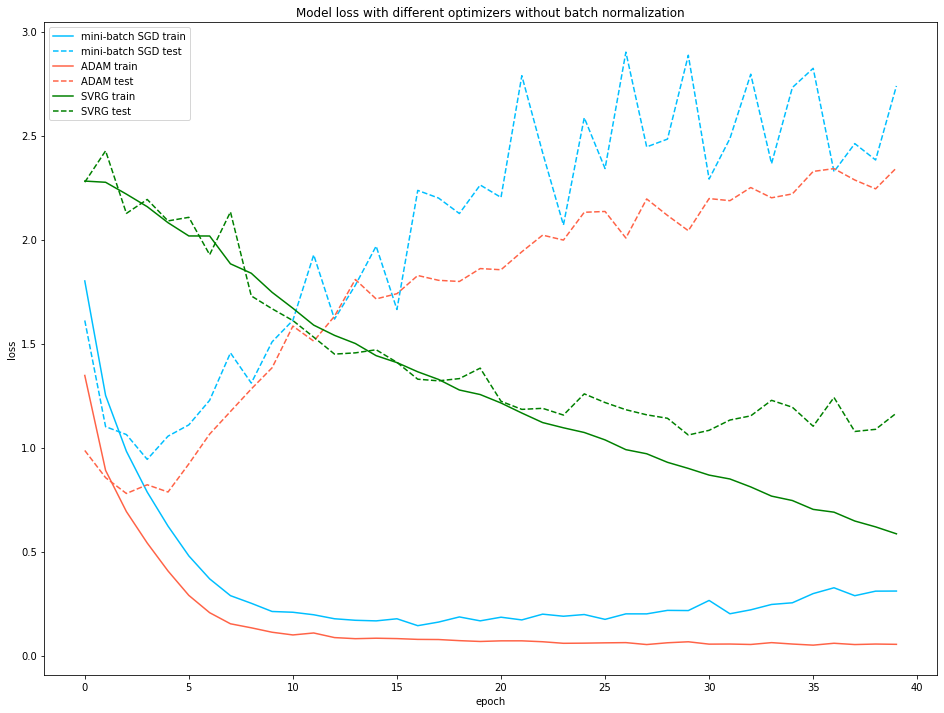

In [388]:
# Compare all dropout values
plt.figure(figsize=(16,12))
plt.plot(history_sgd_final_wtht_bn['loss'], color='deepskyblue')
plt.plot(history_sgd_final_wtht_bn['val_loss'], '--', color='deepskyblue')
plt.plot(history_adam_final_wtht_bn['loss'], color='tomato')
plt.plot(history_adam_final_wtht_bn['val_loss'], '--', color='tomato')
plt.plot(history_svrg_final_wtht_bn['loss'], color='g')
plt.plot(history_svrg_final_wtht_bn['val_loss'], '--', color='g')
plt.title('Model loss with different optimizers without batch normalization')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['mini-batch SGD train', 'mini-batch SGD test', 'ADAM train', 'ADAM test', 'SVRG train', 'SVRG test'])
plt.show()

## Shuffle test

In [389]:
history_sgd_final_shuffle = pickle.load(open('../data/models/trainHistory_model_sgd_final_shuffle.p', 'rb'))
history_adam_final_shuffle = pickle.load(open('../data/models/trainHistory_model_adam_final_shuffle.p', 'rb'))
history_svrg_final_shuffle = pickle.load(open('../data/models/trainHistory_model_svrg_final_shuffle.p', 'rb'))

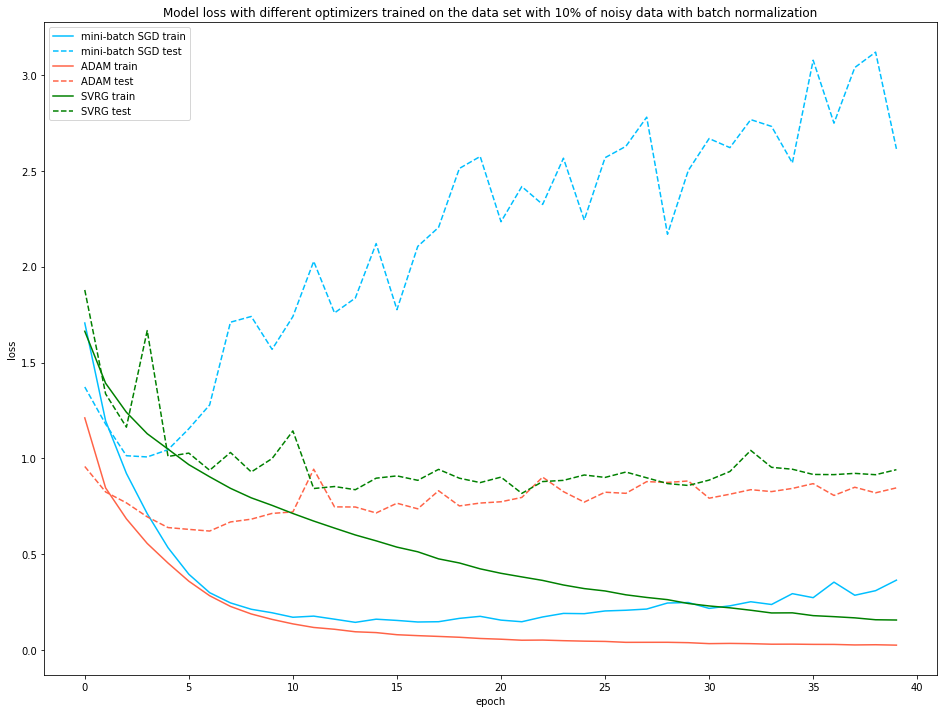

In [390]:
# Compare all dropout values
plt.figure(figsize=(16,12))
plt.plot(history_sgd_final_shuffle['loss'], color='deepskyblue')
plt.plot(history_sgd_final_shuffle['val_loss'], '--', color='deepskyblue')
plt.plot(history_adam_final_shuffle['loss'], color='tomato')
plt.plot(history_adam_final_shuffle['val_loss'], '--', color='tomato')
plt.plot(history_svrg_final_shuffle['loss'], color='g')
plt.plot(history_svrg_final_shuffle['val_loss'], '--', color='g')
plt.title('Model loss with different optimizers trained on the data set with 10% of noisy data with batch normalization')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['mini-batch SGD train', 'mini-batch SGD test', 'ADAM train', 'ADAM test', 'SVRG train', 'SVRG test'])
plt.show()